# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


(np.float64(-0.5), np.float64(426.5), np.float64(639.5), np.float64(-0.5))

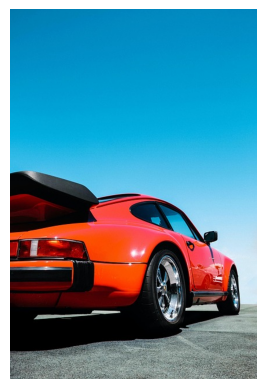

In [3]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image ="""/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAKAAasDASIAAhEBAxEB/8QAHgAAAQQDAQEBAAAAAAAAAAAAAgABAwQFBgcICQr/xABVEAABAwIEBAMFBAYIAwUECQUBAgMRAAQFEiExBhNBUQciYQgUcYGRMkKhsRUjUsHR8AkWJDNicpLhgqLxF0NTssIYJZOjNDVEVGSDs8PTJkVVY6T/xAAdAQACAgMBAQEAAAAAAAAAAAAAAQIDBAUGBwgJ/8QASBEAAQMCBAMECAMFBgQFBQAAAQACEQMEBRIhMQYTQVFhcaEHFCKBkbHB0TLh8BUjQlJiFjNygpKiQ1Oy8Qg0g5PSJETD0+L/2gAMAwEAAhEDEQA/AOOBHzowI2FEBoNKIJEgd697hfKOZCEnc08QAd6MAE7aU+Q66bVINUSVHGtElJNGECYM0QQneSPnTDYUS4BCEdd/SKIIjWdjvRROvang7VJQzIMvWadIMdKIpk04B60KJMoQDsdqeBTxHWn0AmhIlMADoKeNO9OBvpT5Se0TQlKGJ6608GP9qJIJPXSn1jTemASlKGO8gelKO23wo46wKQSoE5iNNKeQpSgAHQ0caf7UjMnQRTxI2/GnkKRKYAetPEadt6IJMaD1p8unl796kGAKMoCI0NPl2+FEEnUxThB36/GnlCJTZTPf4UiiDsaPKQYmnAg7aU9EpUeUj1p40gD1owBEntT5YNGiRKA6SBvTkaSIPejg9SaYSOnwpSlKEDWBpG9OEiNev50RGv5RSg9aESgj85ou0g08dtfnSidOtCUpidZFPHrpT5Qd6QGtCJQx3GtPl02ou80iPWPnQlKHSYB2pACP4U5HoZpZSBmiDQiUxEGlESKOIPxpsoOojWiEShpR0g0QA6QRSI060IlBHpSjWRrRETqJ1pAHpQnKEDTagIOx61LEH4UxTGwk05QCo4E6Uso209aPKZmiiImiU5UQAjU9NdKeDpGlHl6mkAZ1pIlRlIKtzrQEAnUfhUxTAInank9hQnmhYbsSNqJIJ+dEEmOtFlmqAFnFyYDTXr6UspkamjjbWnA+fSmq8yb7000EdfwogNd6eJkgUKKGNKKKcAaSaeOtOEpQxOnWKfckUSU6ATT+lMNlKUM+vxpATRwCaUTsdakGdqUphSoiB896IJgfZqQbCjKGD2kU+UjcUQT3A1p8sgEyalCUoQnXQjtTjrG+1EE+U6gTRRrMGiUpUYTA3MfHSnIMQDoKPfQACO4pwkkwRNCUoYnWZHekUg7bmiiNYmn1iNKUpShSIMiKLUdNKeOkfOnjSZ1pJSgjXb8KePnRACZj8KQ3mhKU2TSZ3pR1mJ/OnjTQ08bRRCUpiB0n6UiFRM/Snn0pDsJ+lOEJvWkR6U+9KDrr8aAESmiBMiaUH+NP12pbGCBQiUoJNIHUd6ffXXanHcRHSmlKHprtT69N6fpsKQ3GkGhCYfGkNqffrTwNzQhDtrJE03Tv8RRQd5FPH+9CEMGdqXpvTwPgKQg9KESmgA/Kl10+NP8ADal60QhDEGlAI160XSaRAjrvShEod6QiJkU4SIzRTgb6TFOEShpdfhRRrOlPShEoIpR3mi0mfzpss7xRCCVikpI6U4HSngHcCiAM6DbrVCzCUwA3/GnCdNaLLrSCep3qQaSlKGO1FlO3WiCdYkU4RPT1qYZCjmQhOs0omjKIG8imCeh/A1ICEpQkZelPlMSQTpRhOoAmdtetEBlMSKaUqMJkmdx37U4T6a0eQxB37U6QNzFCRKbIOgJ6jWlHTSjygQRttTwQOmppSoyhy+g9aePNEDenj+FPBilKUoQIHSDtSPqN6OIgdqUaECKEpQAT0MDeigRsaQ16UQSddaEEoYBOlKNelHHppSAO9OEpTRvFOO0HSkB1ilHxppJd9JpR84pwIG3rrSgkfvoQmjee1IiPjT/WnAoRKbXYCKR20j508emnx2p4PahKUMdwNaXwospjuetLptQiUMTMikN96MJ6TS9NdfShKUMHYmnAkdaf5U+o0jahEoYG1LKNqITGop9jrQkgiQIG9KBtFHGv2dKRHfbahEoDM08dYJotZj8abLpqAfSiEIY13EUgNxtrRhJ7Ugn/AHpwiUBSaUJ260WUx0GtIgyZBpJyhA7GSaQEdYmi33EmkRBmBp+FCJQgdaQ+lFBnaTS7xr60JJiNdO31pgOkb0Y9dYpwCTBFOESgidgDTFCT1j5UZA0OkU+U96SJWJSnWR0oojQxrUgTAFPkA0AmoNaAsrMownTQnUfSiyaan60eXT8p7UUa5TtUpSlRlMmB0NPlhQyzpRkaTJ7aCkR/tRKjKDIQmT3pynUyNKMAikO8ad6UolDAjTpt2mnIk7bUUDcinAHbrQlKCNd4+VOASaKB2+dOB6fGhKUMGNqeNIJogAaRHSOlOEpQwdiflT+naigbRSAAiTFEJIfiSacDsBBp47H8KWw/maaJlMdO/enIg7ad6eNjFKOkUJSmpRHlk6fhRADX0pERqdZoRKaNqRA21PU0Rp411G9CUoYAkn40iJ1B0NFttSiBMGhEocp07mJp06b6UUdt+8Uo32pwlKEgnQfKnj6g08aT12p+k9KISlCBJ1kUsskCjiTt0ilvoYIpwiUBGmhp4IEiigTuKQH4b6UQiUMb9BTkSac9CfjrTxRCUoQDvrr6Ut9z1ooPQUo7H1+NCJlME6namG0/QUYGux9KUftCI9KaUoYMaA6UiN6IA/jTZRMUIlMQNdKRGuv40RB7Gm3760IlNBVoOtLLB/OiPaNaQjUH5fGkiUEbaU8fKnidNaRn11ppyhUkTJ2FOBJIp8ukGnCZnSPjSSmEwTMA9aW560WXbePhSyxsTP5U0swQxrqdKXl6qoynr1mmAMUIBlY8DQSNafrIowBHwpRGtVLJzIYpwJ+lOBHxp4nQxRCUoSNacp02j40UQNKWWdJinCUoIAp/ht3ogNdtqePlNEIlBGvWn13ogmdyKQREn99OEpTQZiNKaJOtGU9/zpwj1BpwiUGXoBTxrHej0+EelKDprRCUoQDvlpyJM08bk9afLpJppShI21po6nvvUkfGl6UQlKGPQUo6DeigbilHTWO9EIlMAPnSielP8o+FOBO1CJTR0IpAbR0pwD3ielOBrt9aEpQEeh3p46HtGlFG/fekO800Sm+HSl2A+dEQYkRvSykaTQlKGPX60gCD8KPKYmnjU6a+tCUhAB1inCZ0/AU8ebWnywNvWhLMmA10mmKTtuaMpOkHQ/nT5dDEA/nQlmUcHWKeIGid6KNxrrSjT8qEZkITpB60gJ16UYBFLKZ01FJGZDGtKImOtHER66UgO2hoSzQgT2FIAzRwd4pZY600syHfeINKI20osvQbUso2nekiUBBIPekEj02o47zpSIg0SnKAJA+fWnykaKEjvRgT0mllGogyKJSzIInfekEnvRwYginCSAZ3FNGZBHptTgT/ABiiIgQTvThBjsKSjKDLHShyipSDMdfWlHx+lNErGhMinAgnrRpTpvSy6SQZqELLlBl0OpogDtRAbCKKNJn0pwlKjKYME0+mmn1o4iO1KNNt6IRKCCdiDSA7HejgTp86WXTfanCUoIOnenInSfpRR1E08EHQiiEShgzp0paaknSNiKMgwIpo6fz86aJTAGfh3pQfpvRRpv8AjTxGkGDQlKADdQ170RCo2M0UCYM0gnTQA0JShg9qaCRvpG00YTp1mnAgzJ+tCUhBEQTr1p4EydJogiD1p8sHUnWhLMgymNRPzpRpRZQTJp8mvX50IzIcqtBMUxToOw9KkjeKUQKEsyApmOvrTwR6d5pwI3ooBGms0kFyGN9flTgT1ogkRHfSkB2nWiVAlCB0pa+tHB7UxTGmxoRKGNZk0+XrRDUaSacCNQSZolKUOUx60hPSiIg5RqafKNwDQiUA16Uon1owjoR9aUeh2g0JSg+JNIAn51JkgidKRSTMTprRCJCGJ0BA7U2SNZo8qToNRSKAIgabR2oRKAJJOXenKVRHQUeUQAJp43MmhLMowDMx6UsqhvG/apcuvWKbSfhrS8UZpQZTGUEn40huR9aMDb8KaOh1polDlKZHb1pZVaAbdzUiQdtdNqQAEb0JZkGWNzNFCyCDGnajIAiBTR1oSzIYOonX5UoVqCaOKQFEJZkJTO9CUq7T6zUhGvxpUTCJKxwTrP1pZdaIJ121+FFk6b0AQswuhR5Rr3pwAJIP+9GUkamny9RTSzKONI7UiDtFSZZ6aUspCpOk9KEsyCDvvSg/s0cHWBTwSNqEZlGEzuNelIDUkmKkA76n4UgDvt0oSzIAmftdacJ2GmtGB3FKOv4Uki5BGugnXtSImYOlSZY1pgnWD9KEsyHzEwflTgRR5TMemlIgDp0oSJQDeYp4UJG9EEnsdOlLKRvNCCUJnQ0gkUZECI1mkBQlKGDvSiN50osusR/tRZdND6GhKVGUk/OlB9RUgSTG89opspka/OhGZCRoetIDTfajyRtoKRQYGtG6JQgGPWnyEaTtR5emtKCUwVag70tUpUZBOk/jT6jTMRUhTJkaU2WTPx+tPdGZCEj50+8kafCnCSO9PlA1MamiEiUMaaaetPBmKIRrp0k0o9fhQlKDKBO8dqID+HeijQmkZmiEpQwTrrSy9O9FHrSgzGtEIlNlAT8NKYiYBNFl6U8dIohKU2uw69aUR8RTkdaQB3mmiUMdDTxuaKO1KO4pJSgInSTSymRNGRNKI+FCMyEADSlHWij19aUU0Sh19TRRRAH19B3pQexoSlDE6mlTwafL6fKkhDHamy0eXrTBIOs0SESqJTprvRECYAj5UQT007UQTp9nehZEqMJkH+ZpASTrUgSCfhThIBMD50SlKiKRt0p46ipSlP7P8KYAiBv+VCMyjCZO5pBIOpM1JGoMb670+UTEfOlKUqKBppB3pwnXQ71LCRrFJKR2pozdVEEyIFPl0kmI71JAJ1PpTxpAoKRco8npFIInfTSjG/pSiRt0o1RmQkAT0+NNlBjvE1IQNj9aWwEChLMgKZiJmnyjpRx6a0oNCWZAAIgAelIJA1jbWjMdDSjXShEoQNZmlFFA36fGiAme9CUoI0melKPoKICnyjrRCJhBA3gzSCdZn5RRaUoncUIlMBrSgdaedBTwN6aUoQO9KiA7U8T0oRKGKbLRR6RT5esUJShg/ClG2tHGu1KB6UIlDlEfGlHeiidRSIFCJQx3pRO+9ERGv76W1CEMDoNDSA1+VFHanG2m/ehEoemlKPx1otPhSgfKhJDFPRZZ6GDS2mhCCO9OU6aGaMwf53pgB1kHrNCJQx16b0o7DaiyjbfTanjff5UIlBAPWKLLrtRRlzETv0FLSJ2NCUpgD86WXtOoo4joJFKNfMKilKGOnTamyE6gaVIewiR60JSJ1SfkaNkSqgR126aU4SQNKOOutLKKcK0uUeWNaIiiCe1LLvNEJTKGINKNN6IAAT6UgBTRKEAHp6Uo+FFlnpSgTrRCJQRp0pwnqDRZRvpJpQNpohEoQIpAaATRwI/jSjfSiEShiR2p4Mx+NOBJp4ESKISlABuPpTkGijSTr6Uo6TRCEOUTMHtTxrNPE6xRZdJka04SlR7elKDpRxM0o7UoTQ/KlH4dqPLrJpQAdzrThKUEAdKRE0ZA0M0gAOlKEIdD6Uo6j6URTrAk9qWTSiEIY1jUUiBtNGABpOg6UgncdKIRKCPnSjSpMsjfT0pwBPoaISlRhIPpNKNhUmRI9PhSy6z2pwiUBEyI60o00Mz0qQJAJP7utME6bUQlmQZQRt/tT/eI2Ioykb96QTtNKESgAn/anKdSDRCDpT5QRBohGZRADfWniB/CpAkDSdKWUa6HQU4SzKMjQRrpT5ep1o/QmKfL/M0QiVGEnYnp0pynpMGjIpR01ohEqPKdR19afJ19Zo4B7U5E/CiEZkAEHca0gAQOvSpAKWWd9xtRCUqPKDqTHanAI0IETvRx86ciBtRCUoY3iny9J+dFl1/OnA7daISlR5Z0Ex+dLKe5qTKRoJpg2giT+VLKjMqkR86QAGpo8s6KJpwBMkb9KFbKjIGkGRFIAjoRUmQfSkUxtA+FSRKjjqN6Ua7CpIiJ1pECdN6ESowNO3zpQOtSQAMvpQxAiaE5QwY0M0gB30owmJB+E0o6zINCUoMtLKZntUhQNppZdDJ70IzII20kzSCdOtHAinA67dhQjMo8sT6ingbQNKkgzIpvj+VCUyhy6jWR0pZT6fKjiemlPlnoIoSLlGE6zpThv1GtFExNPlAEa6GhGZDl19B6U0E7ijyx3+lISB21oSlBEbU4E6kRpRwNiKUdutCJQRJ0/wClLL+I71JH1psvehGZDCjtSyyY0owOgpadooRKCNYJinjTXr3oiADvS+dCUpoEbU0TG+vWjjXTpSA2/KhEoIHz708RrRQNCTJ2pQPXWhKUASJ119aciQQJNHETFNA+XehEoYGg+lOUgUUT00pa9aESggTB1p41iaIDvSKaESh300pdYijynekU6z+6hKUI7UoAHejy9jTREa60JShy6x+dPlB2GkU+UzRZYMSYiIoRKCNYGvb0pBI1I/OjInT50gJ/MTQlmQwdz19d6cD4eoowJ1AGlPlmdxQlmQZRHSTTxGulHl1ingTqdqFGVHBIB7ikEiP96kKRoPnShHVIoQHQqmX0pZe4ijgqmllPQ7UK3MgykilEiIosunwpFMbSaE5QkAUxH8aMJJ0017U+UnpQiVGUwYpssmpIO9LKeunyoRKAgdacAHWKLLr+dIpjXehEoY9KUaUWUkSBPxpRrpQiUMdKUDeaMJnTQfxpFBNCJQZQe9PlHaiygfCnA12oSlDl/wClIJ+lFEjUmll11NCMyHLS0679DRwY26a0omTQo5kITpIA+Z3pQNOkUWX404T6/jQjMFHAA6UQAjUCiyQdzT8uSPrQjMEAG8AetNEbVJl3ApwI0HShLMotjMU5CSRAownSZ1oiD1oRnUUCYnTanjr06UWQmJPWnybQetCMyDID0pQn1n41IE9dTpNLJJA70KMoCkRSgdKkgR86RSRt+NCMyjICdOnakBO4EVIEaSRT5egoRmUWXSCKfKNjNSQB9aRSO5M7UIkqPKntT5Y6GpCNZIM02Q7zQlKDKTFOEyCB0osonWZnpRQOk0JSggSCdQaQRB16UYSY3mkExIjfpQiUAQJ+NPlkRHzo8oEfWnAkUIlRlMCAZ110p8muoBFHEUgIoSlDliQAKQT22oz2mnyknfehEoMv59tqePTXeiykakEU+2p/3oSlAR1P4Usp7ijKaUChEqtytJFNEb7VKEnYa0svpQpZp3URRQwZiKny6imKY37daE8yiy6700K7VMECYjWkU9zpQjMoSkGnI6jpUgQJ2E705Tp0oRmUOUTM0iknWN+lS5BSCJ0nU9aE8yjyydKYJ6ampACPtflTkJmOlCM3RRlOlOEHejCNI/2pwJGvwoSlAESJpssabDvU2UwKaCYoSzKPLO/40suh02qTLG2lORpHShEqIJMQBPrT5R1NGEgTrTjvQiVHkHQ0soHrUgAjUa08d+tCUqIpM/PpT5dSIo4pR6UJygCd5/OllnSNJnSjA+HypwNZNCUqPJtHSllnT61IUxrTwB2FCJUWWdpFPkmNOlSQOtIjTUfhQiUGUjWdqWVJO+ho41/Kll17UIlAB0pQOtSQBEGlE696EkBGu3xpZYVIijCRA+FIpE7xQnKCOu1PlkA7zRddNaRSNtfWhKUGWeu1PGkz8aOCTEGlEHWhEoI9PpSy+sUZGvaaWWZyihEoAB86fKI3/wBqON5pEGB0ka6UIlBB79KcJ+tEUnoelPl6j86EpQECTr12pCdTOsa0aQfx7U5A0ABmhEoANDrpSjrrRhJ3Ap8og6zNCSHLoYOgFOUye3X40YAEEHX0pAaDYnvHWhIlBlI3p8vrRhMaRPypQobIn1oTVeCRA60oO2tSAEgdNKUSdaEZlHlA7x+VNl9KlKQANKbKTqTQgFRAajSnAPWjKfhFIADWNKE5QQCZpikfCpI70iBQgFRx2HzpEaE99KkyyTTZd4jvQiUEdDSyifwowmTO89aRSBoPyoTlBB70o6VJl7gEillGwoSlBH1pZevbvUmWe3amAHahEoADvpPrTwJgjTpRZddBT5dhO1CJQRImmifU6VKQI0HypZRQlKjyjsYp47fOjyifU0gmfKTrQiVHlA0pwnpM0eUDQU8djsKESospPUGaeOlSZRoSKYIihEoIM79KWWfWpSnrA9aaND+VCJUcGP5iniNT0qTKDuBtSgCSIHShEqPLG80+UgbegqTKddqWSBAB07UIUYT8dfzpZRpP0qQpEQYPw705TrtrQiVERA36dqRGhgVIUfCaLIDAiaEgVFlAj8JpATIMVIRoRO004SSCDGp10oTURQRqdhSCTGgPy2qXIOpgUsoIB2+NCJUYST8+wpBMbDUVKUjeQD0mllgwCJ9KEKEJAPYfWiKY6CpMk6kADtTkbebbb1oQoYnpA2+VIATqdKmyAq123kdKQQI9PhQhRAQYIOtEEgHTqPrUgSehEfupBAgdI1EihJR5I0Gh+FEEAaVIGxAPfUwKLLrsFdvShOCosqZ0FLKDrHWdtKscuB9kU6EQCRlB6f8ASiU8p2UBSUnLGvSkWxJlOvpNWVITAkQANqItq+7lj40symKZWOyyZ+Zp8g2NTBuY2+e5pZNCABr601RqoCkdCafLBAGtS5RGsD91IJ9PqaEaqDKd+1OU7aa7CpcmYap9PnSyxGlCFDEDWNKYpB6Cp8kdPxpo16ydqESoSnYRSgAxGtThJI1GtCU9ToD0nWhEqLKOg3p8mh6/DSpQnXakU7yNu9CJUQSY101pZYOh+cVLlMgAfhNIJ2A3j8KESoshJOX5zSCNNdxUuRQMgafGnyzsnbrrQmoskxp8aLlnXbajCNPsx39acJ6yNqEaqLKrtqJ6RTBCu8wdamykgkp23pZAdR1j50IURRuI170ij/pUpTtKYJ+tPkhIzA/WhPdRBJI16ntSyEb/AI1MUEHIQSImlyyZEEUIhQhvQaf7U5SJ+PrtUpQANo7fCnDR1IA09aEQoCB307f7U5R0jrrUwQdSRpEbnvS5WsnXeaE4KiyaxGuhPSlkgxlMnep0NkjVP8aQbJjKiCd9elEphpUOTQmJJ9adKCdhPXapuUfsmPl0M6U4bzapTPz236UpTyFVynykAad5p+XCuwI6VYKQTJj6705b1OmhEnWjMnkVblkaDqOnX50/KOwn1NWOWVCFJGsmJpw0AqSQCIiTSzJimVWCFToDrpETSygRlSQQdhVoNz5dZSDOv76QQQPvE9iekb/WjMnyyqpTqABB6ab0/LA1B37VZDRAlQAnWdxFLIBIKpnpO/rRmSFMlQcswCdj1PSmyd0iCJANWcgj7JJOw7d6ZKJ1ykEQI2mjMpcuFXAiNpHbpSDY1EzvJPWrGQgkEp0313osk/didYn+f5FGZHLKrZARr+P8/CnSlQ7mOw3qxyukGCDI706UEkgozAiZilmRyyVAloq13/jThuQDrCj86nDZOkQQZ1FJTZUmAU+kUsynylClKhEkfGZNFyjGZQMTVlLcahBGk69vXtTpbEJVB+v4Ui9TFJQZAoSE6fDpRBoggEFOmgOn0qdTYOpSQBpM7EVJyvtAAkkiNd6gXqwUZVbJkWUK3jcH8BRFpKjJCPrFWOWAR3OulJSFgkIGnwNRD5VhpQFj+QeiQegjan5EZklPpvNXEtIEKAHr3+FOloJIiNTO9T5ip5EKipnL5lCCKYtgpMo7xpV7lARA8wmAe9CWQACo6d+sVIPUDQVEsg6BMnQzNNyc0xGk9avqaTmScpIIjXp61GG0yMidd9T9aeeVE0IVTliJgaRuYpBvUDXuRtFXFIQpQSQd/np+VItnVKhoAeuu+tGdLkqjyoE5TH402RWmdMCr4bHWNdaDlAJgjSBt00ph6RokKpygDMaq/Gm5Ss0HfqO1XAganKB26zSDY0IHr8KMyiaSplvNoBpRBsA/ZmdJ6fCrJbMGU6KMT2o8gncHMPgIozpijKpBkyPKYnQU4aJBBEjermUEEZYgAkxqDQhtMTmOUdY3pZ0+Sq6UE6lAMHSiLZggJj51Y5SSYBAMzrRhvoUdI2pZ1MUlT5R1SZiKSWQRtCjoAP59Ku5EqB0Hl2k6CnUhJ84ywOhETpQXqXICpBoDUJJjSPWg5RUZCZ/k1fDWbcDMdCB/OtMhgKkK0zdQNfSgVEjQlVUNBRg6qH40kteUnTTWN9KuBjKkDTpoB9Zp0tI0gnQDX8tKjzOxTFBVEsq+0UgxvOwjpTcoJChB0npvVwNiQognYgAafCiLYgkEDSRS5iYoBUS2SgSBMdJ0pw1urIZ11+dXSzqACqdIIG1Py0pCQUEHY9etLmKQodqp8nUJToesUixmTIQCAdddPxq4GwHDoD89QaJLScsETBPTpRzFIUOipBqZTBGsAzvRlkkgkFIP1q5ykf8Ah69ppBtMgRtv3qPMUxQVJLRK9UkAbAUSWjKQUDTc9Ktpa10BTOnqaYta+XQkgE9v50o5iBRhVeVKQkpMHWBRBpR2BynvsKtcvyjy6du9INRl11BGp1mlzFMUlVS0CIMafgOtEbciAR0gSCNat5OpET+G5puWkk6Edj3pZymKIKphlSREDzTp3mj93EpBRO1WkpSRmj4T+/6UwbkQI7fAijOUCgFU5OUZjoVCNtvjT8rScpVprP7qt5Y+0nQ6fKmLYC4667xQHlBohVVNJhRjcwCT6b03J7iTr8xVrlJTmGQafhT5QNQkBMxOpiO9AeUuSCqhaJHcfHakETKggaaTPr2q2pvpAP8A1pKbiARG34UZ0cmFWDZJEkA7mDpT8sBRSpPTp0NWiiSJTHrG2lJKAADljuKA8hPlQqwZSBomTrNGhlIIGUj8KnhI8qvjE604QJylGwkGolxUxTCiDUCCAATpvI+NHlIMlMkmpg3qUQNNv4UXLSUjQfGajKtFOFAlvKPs+nwFPykkzlA9CTVkI/4ok0+QDrHpFLMrW01X5eoGU67aU2QnQSAqNqs5EgAgkRqaQRGxkSDTzKOToqhbgGRsBqBrQhogkFJSB1FXeUrKAZkaaHrTcokASJ/KnmUOSqRZOYnLEdtzrQ8okka69jM1d5QzESI/mKYtHTL1melMOUDQ6qmWpAlOm2vX50ghSdUjU7gHQ+lXS1lSTr6+tNygmFag760ZkciFULYUTLZ0/ZO38/uoC1AGZI21MbVd5RUkgEdZHx7U3JkbHuYFPOkaKp8qTHLEmJO3wH404byq0Gg02iIq5y84EdddD+c0gycwIPTUnYUZ5RyFSLUDPl27jSnLIJjIQCPtfDWrZaCSdcojeZpi2qVGI2kd6M6RoqolrMoqyGYFFyyTBGp19BVosxJESNYnSkWDEHVJEeg7iKWaUCjoq4aMHykkHt6dKIoGciDO/wDP0qxyk6aq01kU/JTmiVCBA1mlmVgoqsGQSNkncRpTllaplOp0NWks5DlB8qvMfX4/jS5RzGEKgncfGlmUhR7VU5QyEKgT5Qe1IM5QCEkfOrZZHlOYgT86LkkaqJ6TAHyoLk+TGyqFsEApB01APWmDSvLKNIjTpVnkhWiiRG3r/Cj5QA2Pl0mjMmKSplowCUmTpMRRBrLvpEz009atlskazI0jSmDKdSTBPfr60sylylW5ZSrUEmD/ANTTBs5RCT29athoqCQdtwTsfWiLAJEEH5UZk+UVULZgEfeMzpvThCtSlMpnWrKWgDm0M9AKINyYB2OumwoLlIUlVDRziEDvrTcsqEBM5tQY6VaDYzAqOp1p+WPsCYggUsyOWqxaPVBIG4+VMG1BJCRrprVpSIMDMSOw1pBsHQ6x9B9KJT5SrcrUnLHxpcqBEROpq1ygRmgjSTp0pctUTKiY6jUUpQKarJQCfKkjWdt/jRKaIGWCdZ0+NWC0CJO22lINAEfahInTtRKkKarlrY5SqNu4pi1IBgCP4datBsiI2A7daYtGIBn0AiaMyOWq5bPlBGx2kaUJaUZ0J06gTVosADSIjtsJpuVCQU96MyXLVXlKI2k9KJTYKgNR6dutWA1IzAkTB26U5aUZQfj3ijMlyiqvLPlKdRqdt6flHLGSeo+X5VY5Q1CpEU4ROvX6waJT5arlsqghJgGdKSW5MqSAKs8uDBk9R9KcNEbEaiJijMjllVkoUT5hoJ33o0oVOqVEJPTaKnLQiFA76mi5OoI77aTRmUhShQJQdISNZ26GiDZKDKdANjvUyWk5YE+s60aWgQPLMaRHTpUZVjaSrpSJBjr9mi5K+h/Cpy1pER6d6LKn1HprSLlMUlV5YnRIjfvT8vJIIiBRjrprFGDIJMmOh6U5UA0FQ8lWhA2n+Ypi3ImJ176/WrGRMR1OtOERCiDA6R+NLMpcpVS3rJGh7Gn5ZB0iemnX0q1kBg5ddv8AekGc26QTHTffpRmCBS1VPk9MpjcgU4bKhISR86uBrWdAJnUd+tOWTslP40ZwnyOqp8lUQE7a5QaZTOwA317R6VdDQ3yx00py1qFayOwozp8hUFMiDprMaDakWlAlQSTrrrV4two6HsY3oQz1EbyTHSjOlyFU5SQSBsPXenDJJEp8x9dIq0WoEBOsbb9aRa6EaxM9I/maM0pchVOWQSSDPXL1/wBqXIAGw2nUTVzlCOkHX4UuUNTB7fZ3ozp8jRVORGsCPSnLIMDyxvqKtlgnRPbeNqfkiR3/AH0Z1IUFT5WgjTXSPWlyohQGg6A71cLWWQEkgnXTrSDMnQfE/ClnRyVWDQA3iT9aQbOUyBEdashkTt8aINAAZvhpQXKQo6Kny5kRE/On5XmmInv+VWg3CZHXrFGlgjQjc7TPzpZ0CiqZaUNIAjSOs0i0Va5Rr22q4Wlbx8PSn5WXYbHT4Us4UhRVNLSgqQmelPyR0RBI09Kuckx0kbd6flafY0Os9qM6kKCpFnqEzB0IFPy5ERqdPSrnKk6CSNdqZTMD7JPr2pZ0+QqZbKiRlGuh19dqXLkEo2jpV0MjQdJE0PKChMSYIMijOjkqpygR5k9fpS5OhKwNB+FXCzJOsHfan5QAylO32es0Z0+SqYb8sSR2HXSnSkyVAR8/pVpTYjNl+utMWtIAHfajNKXKhVuUqQBCp3P89aRakjNG38irIaUZOUnSNelOGtUxtH8ijOmKSrZFakRPTpSU2YEDQ6jtNWcgk6AkiSSdqXK2BSZiPlSzo5SqlnUwNZ2puXMdz3q3ySegPwH8aSW9jE/KAKedI0QqgaiFEDUQf4URbXMkQBvrVotCZG389aXKSVbCNYn8qM6BSVTlK+zAE/jS5O6giJ0PrVsNxl+9GkRSDU7CI2ozoFFVAyZIDfSN4Apw0ZmPSat8kRJ0FEGfLOU9OlLOpCiqgbKREAkdKINHtoOutWuWYKSNvnS5II0kzuI3pZ0+UqoaBCRl1EVJyjulMR3qwEAjTbcUQQdBqZpFysFLRVg2CYImewouUOunyqwEGQNdtKcMkiYGvca1HMO1MU42WFKjE5oJ0ielMlSSoJQddoma8XcT+39jbri2+D+CsNsUAkIdvVuXbnxyyhA+EGud4n7ZHjXijhK+LLi1bP8A3dk01bJH+hM/jWhr8WWFLSnLvAQPOF1Vp6OcYuIdWys8TJ8pHmvpAhh9YCuU5BEHymIqQIEkKcSFTOqhXzXwf2kOMXboO4njF9eKmf199n19AtMV6q8CvaM4Jxq+s8D4jvP0Ze3biW2XLlpLSFLJkDPmLZ1JAEj0Fa1/GTSfZo/7vyXQUfRm4f3lzr3N/wD6C9ABkTo4DBg6zBNSm2PUHXbpPpXSLhnD04eHri1t3kkAqeU0gpJJB7dAdtN64xx5id/gbZcwZwslsycq5C0QSPKSUjWJOmmlTpcXUnmKlMjwIP2SuPRtXpCaNcO8QR8i5bByCSQBO9Lkkjy/WOsVxw+O3EGFXKm8Qwuwv2WyUqUMzLiY0E5dP+Ws/hftE8CXSUDGbfEsKUv76mhcNA/FHmH+mtrRx+yr/wAcHv0/LzXPXPCGKWok0sw/p18t/JdDDJTE/idDSLQJ+MHbYVWwLivhHihKDw5xNhl8pWobZuEhyO3LVC/wrMuWrjZCVIKCZ0Ig1s2V21BmaZHctDUtKlF2So0g9hEFY0tnU5dBpFMlojRI2q9yiSAUiI69KEsqAgD6VPOFSacKmEACNzOhNItJEDr8d6tlGn2dKbIonbbt1qWZR5YVUtKUdCfSD1p+XAzAqk6+hqxy1DWAY+tJKSAIEA/lQSjIoOWYOup0puWnoSB+QqzkOUkSSdPnRBsgjpI76UZwnkCqhowDGmpimLISYA6z8KuJbI1jffsaZLRB/neo5wEctVigazPpS5YHlA6fSrfLJM9dqdKDPfrApZ1LlqoGtZjXsdaflgKmCNOnxq0WyQM3brThBjbbqKXMTFPRVuWCkDKY3+NOG9IMkHsas8snWCDv8KQbIETOv0ozlSFNVsgBAjQdOx7U/LkEAE9gasFHlA12n+NItGeh9KM5TFNVg2QCQTqdI6UxbzRpB3OlWynXbY99qHlHbc7TSDyny1WDe0EnsO1ItbDoO5qyGzOokGPgaRSoA7TNGcpZFVLcCfwn0py2en4GrBTJ1GgpBspMGT1+VPOjlqtyjMyQB33IpskRMz6VZKDJzAkdaflkEHp/OlGdR5arBAIkjcjY0skSRqd+lWggn7Wvr6UwQrQpg+nWjOUxTVfICCNf4UktQJkx2qwEKB66UglWhj570Zyly1XCNJOnUelJLepCiT+dWOWSQYEAzT8tUx+VGcpimq3KMjcRSyBIgE+mu9WUoVGg0/KnLao0MmO9LOUZOqrBrWAdR1nWkG51B26mrJQT/wAPrSDaux/dRnKfLVdLYiCZI0p+WZEyNPxqxkOk/L50wQTqdZ/OlmKBTUIb0JAj5xFOGySEwTuYjepw3IHY96cNKVqRHrFKSnkVcoA3JjQUYTMdR8ZFTBoiQmPQUaULBB06fyKRdKYpqtyxEgETtT8s/dCo+NWOWob9N4O9ItGfhSlWCmviR/0pRHzp6VePL6VTZR8zWUwriPFcIUEsuofZBGZh9OdCh29KxlKjZESvZ3s3e2vf8JJtuEeI3XL7CVENpw++fGZkax7rcq2En+5d8h6FO9em8f4w4f43wn9I8P4kxctLTDqVJLT9uZ2cRukgHrI6pJFfJUwdDrW3cIeKnHHBLzbmC43cBtsZA04sqAR1SCdQn029KAYMoIMQvZvE6FWzykpRClCSV7z3+NahclqFBJkCcoUBG/b5VpWB+0XgnFihbcT2wwu+WI5rerLh9Run5T8K2dx+1umU3thdMvsLSAVsuhaZnv0+YFXtcCsctg6qB1lsKSQTn6QPMBGhB6fKto4f8WfErhcIGC8Y33KSR/ZrhYuGSP8AI5IHrEVrDbjhQpsKzBY20nTXT4VW5gT51LRoQR+6rqdWpROak4g9xWPXtaNy3LWaHDvErvGBe1fjlqoM8W8IWV+mY51g8bZwiN8qsyCfhFdF4e9onwj4g5bL/EDuCvr0DeKMFpObtzU5kfUivINwsOKzBJPWP96qZWZ8yN9yTp/O1behxBeUdHnMO/7iFzV5wfhtyJY0sPcdPgZ8oX0PtF2mJWqb3Dbli7tl68+2dS83/qSSKdTObUSQY+FfPzBsSxXAH/fOHMZvcLugQQu0fUyT80ET866Vw77UvingZQxjKsN4jYTuL1nlvkejrUE/NJrdW/EtCppVaW+Y+/kuVvOBrmnrbPDh36H6jzC9blqSSN4pFIG8x0/hXGuGfa08OcYLbXE2G4pw48dC4tHvdt6nO2M4HxRXXsCxzh3iuxOJcMY5YYva6S5ZXCXQn/MAZR/xAVu6F7Quh+6eD+uzdcreYTd2Ji4plvfGnx2U+UAxv2706Wzt2MVOW5GXID1pw3qITqNPnWTKwQxQZBAVJGsifhRFoHUTp2NThBUAnKAKIN7yOsATM0pUwxQpb102PWkluUwEk/HrVlLemqdd6cNTBCY/dUcysFNVeVlmDpEnWlyiBtIHUVbKB0T0nWnLJOoG3SjMny1U5Q7byBTqaJ2TPc9qs8oa+SetItaAhBI9RRmRy1V5W9LIJylMEbdqslojUpmm5QMzA02G1Eo5arlAOwkEbnrTZEmTG2vWrPKG+XYxp9ablAg6aToelEoyKvy9gdB1g6UuXAmYG1WOVroEwNBrtSKJJEbdBTlLIqwbTMdwDPekGx0n5fuqzyiTKU9I1pBv70z0160pRkVXIPh070+TYyRPY1a5ZjRG/SJpcoEZj9aJRkVUMpCgOh13pFuCRGo1q1yso+yMw3FIMkJkpBnejMjIq3JMgyJ7U/KImBpr61Z5Q2y/ZnpSLWqfLr3jrRmT5arFoSQQQDsBQ8oA+uoA71b5JkAAdelPydYAn1jSjMjlqsGvNMb9dppuV0106H8KtBoxJT00py1JHliKJRkVblehj47UymzI0P76s8ry6D59qIN6hRTruaWZHLVXl7RPx6Ug1pInT03q2GwBBGm3zpBsaSnTajMny5VYNAiIkdqLk/Lt/CrIbMAKG57U4aHRIBFLMpCkqobBAgH4elElok7TA71ZCEp2AgdQfSiS0Nso06RRmUhSVQt+YAggzPpSLZnRwgdqtFuUzHypJbEdPnpSzKQpr4a0p9KY/Cl0ryDdfRaXzFImhJSPvD60ioRMifjThKU8nekdDqaYqnbT1ptQfhThKUQMgjcba1lMH4mxvA3Uu4dfut5SDGbSsSSRrr9KQPyohLfddawPxxfS2m2x+zUtOUJ5jJAVA29DEnoPjW7YNxlgWOJAsMQadWo/3aiEufNJ3+U15wziBprTpWUqCkmDvI0M1MPI0USwFenffAZPMJO8Aaio3LpBJCjrofLt/O1cHwfj3iXB0hpq+NwwP+5ufOn67j5VuWFeK+F3CgjGLF21UQAVNnmIJ+G/51IPCgWELoyrxL6sq3ABmKYmNf40yrpSGyha0qSrUEDUelYG0xfDsTTzMNvmbgET5FSR8RuPpUinFxIEpO+vWmHQq4grJm7bKAUpM/xp7LF8W4fxBvG+HcVu8NxBgjJdWbxZcH/EncehkHrWJXcJSmVEjSZiah95lCsq5HY6DWrWvgy0wVF9NtQFrhIK9e+B3tUM8TXdtwb4ov2llij6g1ZY0lIaYu1nQNvpHladJ0CxCFEwQkxPpAtOIVCklKhIIOhB9a+VVwttaFIIEKTBSRoodjXqr2Y/aaBXZeGHidiQObLbYLjNy5sdkWtys/6W3D6JV9011mFY0XEULk69D9D9155xFwq2mDd2Q06tHzH2+C9V8swAPprUiW9NjrppU3IyEpcSpJSQDI1SakQ0SrzAbzFdKXLhm01CloSFQBPXrThBJ2071ZDQTqR8poVJCdIBI0+IqGaVby4GqgyHqiD/ALUsqIzCNtfWnW6hHUD5/SnaQ65AYt3HJ2yNlQH0qWqgYBgbpoEamPUGhyRGYgHr6inuT7qnNdqSwkdXlpb+uYisY5xTwuwuHuK8AaV+y5i9qk/i5VT7ikz8TgPEhZ9HCb+41o0Hu8GuPyCygbMyIPoP96blydvnWNZ4r4UdUEt8X8POHsnGbUn8HKzFmprEgV4e8zdpOpNs6h4R/wABIqAuqDzDXg+BCvqYHiNJuerbVGjtLHD5hV8hiI36EUikaafPWKulgglKkFBGhzCKYsCIAgelXZ1rjRjRUyiN+u9Ll6aAp1jerKmwOgmdv53psmWIRPTfenmUOUoSiANBrvTFsncH0qcoSQkRJjcU+TXfb0ozIFMKuUCQYPoT1pJb00BMCrORIEwKcNaAmCY3mlmUhTCr5BBBjbUzSKBoMoMj03qyGdYKR8d5pw1OqUxrqaMyfKVYo2OXrprSS3B16VaS0kKnTUn/AK0izBJIA6UsyfJVXlmT07A7Ui2eiY116yKtloDUDfYgUi1qQkAkDY0ZkcpVQ2okbCe3WmyEQBHXrVvlCIUnQHTrTFlOoy7aAz3ozI5KrBvXTTvS5Qy7xvqd6tBqfujeN6Llegme2lGZMUVV5auo0pBvp31+NW+VKZAA6melLlBX3R8KWZS5Kqhud++w6UuTGkCNyTVzlDoNPh++ly5gfXXWjMnylWSjKQonKdo3FPyZ0MHNpH8KscsbE6R1FEG4JlO3akXJ8tVuVJkA6Uiw31Bn0FWi2c0GB8KcIEfZTSzKXLC+Ldt4fYU3lVdXty8RrCcrY/eay1rwzw3aAFOFMKP7TxLh/wCYx+FY1zGblepdyjsmoFXylGStR+Jr5/f63V/G8+79Bfe9uMAw8/8A01q3TqQCfiZK2gP4XbeRlhlOXohlIj8KidxC2eTkVaMrT2cQlX4RWue/Hor50QvgfvVR6oRqVs3cQB4yNAA7AApMQ4fwK/JUbBFss/etjk/Db8K1++4Lu2yVWF03cJ3CV+Rf8D+FbALwdVUXvQPQVm0bi4obGR36rmsQwjCMUl1SmGuPVvsny0PvBXP7qzu7JzlXdu40rspMT8O9Q10hOe7SWhbl5B3SUZk/jpWKxHhS0cBWm3es190plH0P7jWxpYmw6VRBXGX3BFdgNSyfnb2EQfjsfJaZSrJ3fD2I20qbSl9A1zN6mPhvWMUClRQoEEbg6GtiyoyoJaZXHXNncWbstdhae/6dqQMbU+ampVYsZStPusLC2VqbWDIUhUEVsuG+IOPWYSi4dRetp6OiFj/iGtarMUp6ijUbIIB3XUMO4+wS9ATdKXZuH7QdEpPwUP3isy0+2+yXLd5LiFfeQqU/WuL51AROnrVi1vrqzc5lncusr7oUR9e9MOKgaY6LrjrjhQExKdInvUDq0KlpSQEmUrSr8q0mz45xRqBdpauk9TGVX4aVlbfjDCX0hD6XrdX+NOZIPxFTbU6KJpkL3h7KHtNW+NWrfhl4mY2yzf2TB/RGM31wltF0w2mTb3DiyEhxCUylaj50pIJzJGbpfFftaezpwYVtYl4r4RePpkFjCA5iCz6AspLYPxXXzQGI4fcoKWrq3ebUCClSkqB01BB/Ku7cFcC+yne8F4Hid/wVxZi+Jv2wXd2ts4+pCbn7LiApltOZGZBKQXDAVqZmujtMWun0+W1zBA3eY+oXKXfDeHCsa7qNV5cdGUgXa94a0ug+IC65xL/SU+GFglbXCPAPFOOrToF3bjGHtn1gc1cfIVy7H/6SHxYxdarfhHw14XwtKpyquDcX7o+q0oP+itmwvhDgZKgOC/ZMw9KEnyXPEd4pI9CUqW4s/hWfXh3EWFN/2/GvDrga3EfqsH4dtlvAdYeuyrX1CK1t9jjKA/fXoPcyfmAB5rucA9HOK4lBssFcxv8ANWDQPGKrnO+DVwm89p72yuLsxtOKMSw9lewwvCGLMJHosNg/81afi2J+0RxQ4WeJvE7iW6KzCmrriI/TJzvwivQONcUeDlgCOJuLsZ4pdSf7t94hk+nLbSyz8oNDhfitaIRy/DLwdu3Wzol1ixyJ+am0R9V1ytzxHQcZGZ/e79OHmvV8N9FN7RAbdXdOh/TTBPl+78guCYV7NviXxL/aFLdcCzJW8+tQP/EUkfjW14f7FPElw2ld9xFgtss/abU444ofNCK64vFvaKx8xb4Jg2AtnZd08gqA+Eun8BS/7MfFTGxPEni+8yFbs2DCyPqVIT/yVrXcQD/hsA8/lK6m39FmFTmrurVT7mD/AHAHzXPGvYnwi3AVi/iFaWyQJK2rVY//AFFJFXML9nPwi4Xvmrx/x3xS0fZOZK7G8t7ZxJ9CkqUK3tn2d+EVLS5jPEPEWJOn7RXdIaCv9CJ/Gmxbw49n7gtAd4ltbC1URKRiGKvLcX/lbK8yvkmqDjFeucobPu/MHyW8o8DYNhTee22DQ3+J9Vw+UhdO4X9orhDgnA7Th5Pi1d4qiyTkFziVwu7fcE/fUG4MbDTYVsNp7X/h1mCbzibC3vU2zzZ+qUCvMuIcaezXh6lN4V4aqxkgaKawoNoJ/wA9wpJ/CtSxXxY8JW1FpjwE4fSOhucQbQR8Q02r863FrcY2wA0WFo94+ZC5zHcT4Lrg08RNtUPgah+LWOK944P7SvgrjRS2eNsLtHFaDmXaQmf+PKRXQcJxLB+IWE3PDuL2WKtK1CrR9LpPrAM18qLnxF8K7glbnhDw7bz/APdeIL9o/wDKmPwrHtcUeH/vybrh2z4kwd1CAtRwfiPnOtrKoEIfZQVAejkyR610drj+N239/SDx4tnycT5FeN41wl6PcXk2VTkPP8nNy+8VKeWP8zfFfXBQAUUqGVQmUkQR8RSnUJ3Hfavmvwn7V/ijwkWbXB/HJ/EGUK8uGccYSrUfsh6XQn48xFd64L9vPCCli38W+B3sGbdhIxrAHxiGHqPcoCipI/yrWf8ADXR2fFdncEMrg03f1Ax8fyC8yxb0W4natdXwyoy5pj+UjMB3gFzR4Zye5esAECdupHpRIQFid/wrB8I8ZcJce4OMe4J4kw7HMPIGZ6yez8sn7ridFNnbRYBrYUZREKH5yK6NtRtRudhkdoXnVW3q21Q0a7C1w3BBBHuKQQkpnL0jSnLSTMJ20+FSoAnfbejDcyRp3IqJd2KQYoMk6iD1NOGwNRB9JqyG+wGnrT8vTTvSzhS5aq5Bt0jUClytAdu0Vc5RB/23pBtOhMA9qXMCfLVTJBmKXLRvOh6xVvkwZGnWBS5UEyQBt8aXMRylULYBjuTuaRbgAyNtutXOSBMdBEClyQnRI17ztSzo5aphrvAH5UXLEA+sGrYbHVIiKQbBVCk6HSKOZ2pimquQH1PxouWmSZTNWgz6COvrT8rURHalzE+WqnK1HlBPTpT8uNhBPSrYaA2T0+NOlo/ZGvX50cxMUlTLcdo0IouXGgAj41a5ZKRBk/lT8o9CPpS5iYpL4Um5OutN7ySNzUIS4syEzHYGpm7G5WZKSgdCvy14+WtG6+p23Fep+GU4uD1NEi4O8kfOpU4YkCXHjGs5daL3K1QJBWqO5qByrMptuNzp70KLiTAmavsuMW4BeHNd/wDDmEp+Pc+lVUtIRq2EpjsNamS2yuZTrGhql7AVtLZ76epIJ79lmU4s6ppIbaQhMD7NUr7F7llHlfXmUdidPpUTJIKkKjymqGLK1bIEaGKop27M8Qtpe4tXFsXZzPw7uil/TSXDF3bNrP7aDlV/A1HcCwvxCloXP3XhlUPgrb8axS16lRNRl0b9KzhbBurNFyFXG3vBZXAeO/8AWvvlSXeCsJ1bK2SdgrzD61jnsOuWiYSHB3QZ/Derybt1AISsgHpuPpTLu09UAH00rKY+q3cytDc07Cv7TG5T3fqPILEkFJhQIPY0qya1tu6KyqnooVXdtmwdRkVvvWQ2rO4WoqWpbq0yFUpUSkgGAsH4UMdqsBlYhEaFOnett4C4C4g43vRb4Th71wgKynIkqk9gBWpoyg+eflXs72Y7Hgfi3w8OEPKxH37CHFN4hh6b1duytDiipt0pZyFxKh5TnUrzJI2itVjFzWtrbPRGsxPZ39/l4ruOAMEs8bxYUb06AEhsxnI6TBgRJMAkx4kaZb+y7gOA4UeJfEnFnMKsGnA0be1HOunXSkqS0lP2UqMHUnTfpXU8B404vscDs+F/Cjwou7TCrFvlWrl3mQgJkkqKnC2kkklRIzSSa69YM2eGWLeGYZbItLRkAIt2RlQmB2HXXejUuSSTJ7nWuFqX108RVeT7z8hHzX0zYYBZYY4usaLKU6EtaJ+JnzBXKFcG+M/FIJ4n48tsGYXqWMPCnVgdvLy0j6qq1Y+AnBDDgfxq8xfGXjqo3V2WkE/5Wsv4k10hSlbTQmN/3Vhmu4HT9e/fzW29UY/+9Jd4nT4fh8lhcJ4M4O4fyqwXhbC7RadnG7VPM+ayCo/Ws0464o6qJB0idKAzsRuaUkzFVmu4GeqyKdJlIZWAAdyEk94HSobm8t7C1fvb65Rb21q0t551wwhttIJUo+gAmpdJjtWF41sLfFeEcasLlu4dbcsnVctgAuLUgZ0pAO4KkAEdQTVtCsKlVjKhgEgE9gndU4hWq21nVrUGZnta4hvaQCQPedF508TPaO4gxm8uMK4OdfwjDUlSUutHLePpHVa92h/hQQRPmVOg4s/iN/cPLeDxDjhla80qUf8AEs6qPrr8ak4otrW24nxizw27duLBq+uE2q3UhC3WOYotLWkEiSgpJAJGulUm1ACCIr2yxsLe1YG0WwPM+J3Xwvj/ABJiePXBrYhVLzOgP4W/4W7D4eKJdq9cn+03y1ydgSfzqVvCLIAZ21K+JqNCxOhmrTTo2V1rZso0urVzVSrV6ORfoXClwFWqPWZrDYzh9vgl6zcYeHuStAzBSvvfeSD26j/as80oAjoO3SjvbJvELVy0d2UJSY2V3FSr2jK1MhgAd0VdC6fRqAvcS3qrWCYBhHE2ElTWI3dtdt6LQTzmlAyUuZFzAOoIBEEEVh8S4M4kwDmXFqw44wqcz+HrJBH+No61T4Xxe7wDF+S6lWdpSklH7afvJ+Y8w9R611+zu0uJS6w6FtuJCkLTspJ1BqVpaW2J0crxleNDH2WNeYhfYJc56LszHaifoRr4brlnB3iHxbwJjTeP8KY/e4XiLBEXWHOqadidlo2UNNQQQa9veBv9IPhuKC3wHxrtGrZw5WhxFhzRDU97q2Tqj1W3p/g615rxfhLhziMZ76wDb/S4Y8jgPxGh+daNjPhhxDhS1XmDrOKsI1zMeS6QPVP3/wAaqOGX+FO5loZb3be9u/vE+K2Q4iwriCmLbFma9CdHD/C/6GJ719nMJxTDcaw21xjBsRtr+wvWw7bXdq8l1l5H7SFpMKH8mKySAkgEbdq+QfgV7THiN4EYotXD90L3B1OBWI4Hd5hav9CSje3d7OI02mRpX098FPG3gPx04W/rLwXfqzslLeI4Y/AusPdI0S4Buk65XE+VUHYgpG0ssVp3v7t4yv7O3w/UrmMZ4Zq4WPWbZ3ModvVvc4dPHY90gLoYSkEgD404QASAN/zqRKEmSBttUgQNogRHyrYStA1ihyJ0I/hSDYMmN6sckmZG/pS5Ud46CJqOZS5ag5Y7ADcUxTIkdT8KsBvWQnTv1pw1CtQRp/O1GZAYq+VIMkad41pBtI7g/GrAbMCafl7iIO5jrSzJ8tV8vmnLIiDSiYhInrVjlJkEDbanDUdd9tKMyOWq+QRokU5QM0ATO4AqwlEGfrSDYSRqBRmCfLVfJoTr8KfJMgbz3qwUeaQRrvSyCfMT8tKJT5arlJPRXzpZEH7SlT8KscudNT36UWWev4UpT5a+EKrptIIFwgf8QqJV8wJm4BPcA1iJiRBFLMdpmvKxRX0S7FH9B81lv0iz1UZO5g04vmV9jp3rEFZHWkVCnygo/tWqN4WbFw0oApUZ+NEl0zKVBQHrWAzgGSY9alauXCofrwkdZUDUTRV9PGDMOHmthZdhUyBMflVDF3czrfSUmNfWgbvGGic901r/AIxVPEb21cylFyFqQCAAJmlTpHNMK68xMOoFubz71E47MgVCpc1Cp7N9kE/GgJWdJrMFNcvUucx0U/NKTObUVGp4TIEmajy6604TrUsrQqDUeU5ecny+X4UJzEyST8TNFHpQkdKkI6KDi4/iTHbalr8KUztHyp8pnQfSmownQnMpKe5iuj+FniBf+GPG1lxPbBblqP7NiFuk/wD0i1URnT/mEBaf8SR3rQLG3XcXbLKEyVLH51sowt5SpCDJgCBJJ7RWTSsDf0ntiW7FZFniT8Luadei6KjSHN93626r6L4ff2WK2FtieGXTd1Z3jSH7d5BlLrahKVD4g1OUmZI9dK8zezR4hYrgWLp8KcbZubqzdcWbFbTS3fcHiMy2lqAKQ2oz18i5ncx6jShKkg5HSdx5a8xxDDmWVc0H1B3a9PcvsXhzHqePYcy9a0tJ0cCNnDceHYeoVMg9RTKSQYmr/u8yeWv0BA/jQm1AGra4nfT+NYwsmO2d5H7LeisAqEEnppQnbXXoO9X1W3/+pWvXKP40Jtj+y5/p/wB6fqAOzgpCs1USme4oJIOZJPcVeNqCZAX21Qaa4slW6y28UhW8FXcVW7Di0SSI8VMVmExK8xeOPs+4hc39xxtwBaJuA6Cu+wlAhebUlxjvPVH000HnZCVOZw3mzNnK42oFLjZG4Uk6givo+bVyJTrHZU1oXiB4HcD+Ia1XeNYSu1xKITiVieTcT/iMZXP+IH4iutwbHrqxYKNy0vYNiNx914vxt6JLbG6r7/B3CnVdq5p/C49o/lJ8IPcvD6XABtrPWpmXJMEEV17i/wBmLxB4fLlxgK7fimyTJAbi2vUj1Qo5V/IkntXKbnDLiwvlYbeMXFjfIPms79k2zwPwXAPyNd3ZYpa3o/cvE9nX4L53x3hPF+H3Ft/Qc0dsS0+BEg/FSscvTO4ATpEgVlrRhp2EoczEyISZP0FdI9nN2zXiuK8O4lhVsu5dZTfWq37ZC1jlnK4lJUJiFJVp2Nd7Yw+2ZVmYsrdlRMktspST8wK7TD8K9apCqH7935rxfiDi79kXjrN1EkiCDmiZHgfDxC8N8W4Q80oX7SVNvW5hzSFADY/EGtv8J71/Hrpvhq2QhVxcZ3LRJWEgqSJcaBOn+JI7EjpW/wDtCYDYYfxFa4s06zzcWtyq5t8wz5kEJ5hT+yoaT3Sa4NZvXvDOPtOWFybd1t1FzZPA/wB26kyg/CZSfQ1o7umcJv8AmDVswY/XUea6vDrpvEmDjLo4tls9CPhIB+I2henbPw14mIHMt7NsH9u4Bj6A1mbLwyxEOJNzeWLfctBSj8tAK3Dw+4htOP8AhXD+K8PbCPe0FNwz1YuEaOtn4K29CK2lOEukfZPoOteg29rRqMbUp6giQvCb/iG+t6z7etDXNJBEbEaHclcN8SfAmyx/C1YlgqiMZtW8zL6kgLWobBUfaSdiDqJ0PSuH+Fnitxn4E+INnx3wsDbXFq6q2vrB0nk3DcjnWjyf2TEjscqkwU17nTg7oGbIRr2rzZ7TXg27hanvEjCbVRsLgobxptKNWFEw3dD0BISr4jvXN8T4GHU/XLYQ5upj5+I693gu99HHHb6d1+y758tfo2dpP8B6Q7oNp06r6U+FHiZwn4w8DYbx/wAGXJdw7EkkKacMu2j6Y5lu6Oi0E/BQKVDRQrdUpnoO0DWvkT7IntIYh7O3iCqxx955zg7HHUW+N2yZVyFAw3eND9tEyY+0gqHYj654fd2V/aW+IYfdtXdpdsouLa4YWFNvNLAUhaD1SUkEH1rS4ff+tsyv/G3fv7/11Xd45gow6oLi3E0X7f0nq0/Np6jtIdE+QgwPvUQRpprEad6kDYKQCNjH4b1IlHlEiO47Vn5lpRTVYtxEGOmpog0QBNW1tQYSZnaKFI7g6jao8yVLlAKsGTPqe9LlmNAD8KtZZEQZA0JpsqREQTt8aM5T5YVcNEg9AB2pBtQ1kiRFWClJ0jcUgIMgfI9KM5Rywq3KVO256ii5cjoCD01qxkEAEDsJpZRE7fGjMjlhV+XA2A1py12Ez36VOUCdDI2pw2ACDSzJ8sKuWgIgCD604a00T+NTcvMnqesTS5YOpGtGZMUwF+e9btwr7iR60MvE/bA+FTlJOgPpS5SokJrzuQvXzScdSSoId6un5UxQvqtZ+dT8pyNj9KEhI+0tI+KooDlE0lDy09Umm5Y6VsWEcC8acQgKwHhDGcQQrZVvYOrT/qyx+NbzgvsveM+MZFOcLt4c2r7+IXrTMfFIKlfhWHcYtZ2n/mKzW+LgFsbXh3E77/y1u9w7Q1xHxiFyTInbLTwBsADXprA/Ymxt3KriTjvD7TqUYfaLuFfDMsoH4V0HBPZE8JsLyrxMYzjSwPMLm85LZP8AlaCT/wA1c9dcdYNbbVC8/wBIJ8zA811dj6LuIbvV9NtMf1OHybmPkvEhAR9qB8TFZHCeHOIOIF8rAsBxLEVnTLaWjjp/5Qa+hWB+FHhnw3l/QnAOB260bOqs0uuT/nczH8a2pJWhsIZUUIAgIR5QB8BpXO3PpMpjS2tyf8To8gD8119n6GHmDeXQHc1s+ZI+S8BYT7OvjRjCQu34BvrdG5VeuNWsfJxQP4VtuHex34oXcG/xPh3Dwd0ru3Hlj5NoI/GvZ3LJIga/nT8kzr19a0df0h4vW0pMY0eBJ8z9F09r6I8Bo61nVH+LgB/tA+a8sWHsUXBCVYr4jsoPVNrhal/8y3B+VbDZ+xlwE0B+kOLOIrkjflJYZH4pVXocW50Ovan92BVHfWK1lXi7iCvpz48A0fRb639HnDFvtag+Jc75uK4jaeyb4P2wAes8avI/8bEiJ/0JTWXtfZs8E7YJKeBWnT3evrlyf/mRXWk2pIgoP+1ELXYmBVXr3EFzrz6nuc4DyIC2lLhfh+h+Czpf6Gn5haNgng54SYNdt3DPhtgkIJBlgrVB0MFZVXQMP4B8KrYe8YXg2F2xJ1P6PYC/gSUSKi93SN1D5CklCEGZ17zXTYBfX9ocl/7bN5c4lwPcZO8CQf8AvlfsmzpkOtmCmf6WgfRZa6t7c3Trtri1o0hwhUBjIdgIOXQ7b1HymgnzYuyfgyr+NYwGBqof7UjG8zW6FfDGOLmtOpn8b+v+ZZDLcsaGh2g02H2WUyW5JnFWtevJV/Gn5TMf/Wluf/ylD99YmRtmigKgD2qwYhYD+E/6nfdS9XJ/iPwH2WW5SdhiNr6SFin90UdBdWavg6R+aaxGYlW+1LOe+o7VIX9idACPf90/V3dCsubO6+6bdU9Q+n94FFcWN0VD3WzUUx5gpxC9esRH5Vhw4RrJ+NGHnB94j4GrOZZ1hAc4eBH2UTQeDII8/urirO6SBzMLWQBvyT+aZqHNaIXC0ONE/sulJ+ihSavrtBht9aSOxq2jHb5Ahb3MT2WJHzmpMtLcmWVPi0Hz0SLao6A+8j7quLe1ejJdrCT0daCh9RIrH47wFgfF9mbDHsBwzGrYj+7dbS6R8PvJPwrNpxHDnVH3vB7ZRJ+02nIf+WKsIYwC5H6q4urVR6lYcA/1CfxrMba15zMcD7z9dPNY1YlzSyq2WncEAj9e5cCxf2XcPsLwYl4b8WYxwnfskqaYUtVzbonoErKXUA9YUfgarDH/AB08N1ZfEDw9RxdhTcZsUwJWZ9Kf2lNgZtu6PnXpZNljIRkssXtL9oj+6ukwD8M2YfQimWAyc+JYFf4fG79oPeGfmASUj4K+Vb2w4lxfBj7LiB3iW/HUea8h4u9EHB3GLT63ahr/AOan7Lh7tD7mheGPGHjvAPEbFxecMMPuWVmyyGFOtBF0zKP1zDzYUSIc8wV6n4VyLHcP9+sVONiXWCVp+HUfT8RX0K4y8MuB+NQu9xzh7A8fLeovrQFi9ZgaStspeQfjIrl/EXscYleWzeLcH4s8+w+gLaZxEouDH7IfZhzTaFoWfWtzb8ZW+MOey8Y5rjuQCR4yJ0XlN76EsS4apMGC1G1aTNACQx/gQ4gT26yexck9kbxMZwTjL+p2MvJ/R3FKg02pZgM4mkfq1T0DqfKf8Udq9zotEoAhgBJ1kDQHrXgDH/Zq8SODLx24uMGxBhlGZ03Fuyu4DJScza0KaGYKSoCCpKdCZivavgL4g/8Aap4c2fET6wjFrVSsPxpkbtXrYhZI3AWIcH+Y9q73hjFOZQNs5wMajXp1+/v7l86+k3g6vh163EKlB1MvgODmkGRsdRrI0kaaDXVbSq2gQEK2Gw6Gsdi2EWOK4fc4bidm3d2V2yu2uWFiUuNKTCkkeoMVtC7QgiR9rWd/x+VV1WZKSATOmldaKojVeUPs3NMt0IXzK8ZfC6/8MOMb7hW4LjjFugXWF3Cx/wDSsOUfIT3W2ZQr4dgK9bf0d/tPqt32PZ68QMRysvKP9Vrt9Ucp1RlVion7qyczfZRKfviM77S/hG74i8CKvcEtkr4k4bz3+FkJkvoj9dbEdlpGg/aSO5rwLilg9gxw3irAn3WrG+POtXkqIctbhsjOyojULbVBHdJSa80xmxqYVd863/DuPDqD3dPgd19IcF47R4hws29+ZP4XjrI1D29/8Q78w/DK+86ZCuo6GalyaR/MV5+9jH2krf2hvDnlY7dIHGvDSEW+NNEwq6Rs3epHUL2XGy9dM4r0OlI9dDWfQum3NMVWdf1C1l/htTDrh1tV6bEbEHYjuI942OoKgKO8gjpTpbg6D4RVjKB9r8dKIWdyRnFo8U9VBtUD51bzFicsBQcozoNPjS5RO4qwhtWqikhIOUmNAfjtRlKUqjMSOtRL+ikKYVTl6CBInTSi5KtI0BParOTQGYPSKWQa6kkbijOU+WFWU3v+NOW09xI9KshOkHftNLIDp2NGYp8sKtyzqRv8KRbCRrP0qzlnYHXoetNk0iCKiXoFMKty9swpghJ1M1YKBAH10qJSRmOn4ioF8K5tGdl8u7T2RvCljW4ueILtWkhd+lCf+RA/OszbezH4L2/2+Enrk938SuFT9FAV0V/inhGzH9r4hwpjqeZfNpj6qrCYv4x+EuCN86646wBxxS0tNst36XCpajAzcskpQN1K6AdyK+S2XXEF26G3Lz4F30C/QR2C8NWIzPt6Q8Ws+qxtt4C+EeGMtXLXhlhakOLU22p1lb2daQCQCtRGgIk9JFZyz8POA8PLbtnwLw9bONqC0KawxkFCgZBByzIqtw14lcHcQlX9V3se4nuVEB1/DcCunkGJgBWQIQga5U5oHqSSdnDmOFnnq4IxhhsH7d7e4bZj5866SRt1FWVMH4hujoys4dpza/HoqG4zwxYaGrQae4sH1UpW4QAVqIHQnT6UyWxIy1WcvsUSkqRhGDheUKCHuMsKQozt9hxY/GsddY9xrbDO14b2twgpzBSOLrRYI2+42ajT4Kxp/wDwCPGAirx9w7S3ume4z8lng0raQD++iSwVDvXObvxwxXBrhy3f8J8Ju7hnQ26uKFrcKv2cqAiCOxIqBv2o8eSQwz7PHC1sp08sPXOMJXlkb/rn1AfHKYrMp8C4nu9oHvH681hP9IuBTFOrPuMeQPyXUGrMLUQlaUQCZUoAf7mj9ySpKcra5jzSI19K5DaeP+MquTbXHCPDVpDhbzL4xt4md/KgmNq7V4B+JGAcRcaWFlxbwpwze2r7waIY4rW7BVok8tu2JXqdpFZ9nwRXc4NrjL36H5E/JSuePcJp0nVqVQvgTAa4E+9wA+JVUWLgPmQZOuvanNsEiCZ6bVc4z4wxBeO3iMH4J4Yt7cPrQhpjjaxCwkHTy3ZZUD6RWJa/r9ep5tr4W47dJB//ALfiOE30/AM3iifkKyLjhl1mYpW76neAfyVtrxtg9w0OqXLGE9HOAI8dYVjIhJgCYpitKNiBHYVisVxHHsEQXOIvD7jvCEAZi5d8K34aA78xttaP+atdZ8VPD68dUwjjjBm3kKyqZuLtLDiT2KHcpB+VaK5rXtjMWjmjvYR9Fv7XFMOvP7i4Y/we0/Ircy8B971oC6MuhFYy2vmb1sP2dyzcNq2Uy4lxJHoUk0ZKgfMCD66Vo38Q180Oaty2kO1XFOp6gTQl1M6a1UK1dT8aYriDOoNQdjLn6qYpKwp0Ax060Cn5BV61XKwBApitW5/Kqzijz1UxTVjnEDfprS5s7kTuKrBR3M04V6zE1JuIOJ3TyBWAswfQa0WbqDpUAVO9SI2kA61n0ronqolsKVKjO+tSJJG21RJMHTX+FTAk6CJrZ0L9oMSqnIh0jr61IlJ0BmiQkq2jX8KMIjWa6S3qFzQVSXRoocpGknTTWkmRoNtxUxT0I2oS2VaxGlbGlcOZ1SDkbN3csmWnlCOk1lbPii+tCFFaiesGKw+SDJOhqB5xIk5jWUcZdbiSVU+3pV9HNlbLccV4XeEKxXAre5UNQspCXEn0WmFfjVjBuJuHbBxTbD97bMOmVsP/AK5ue6VDzJPrrWiP3CRqDANVVXaJy6Ce5j8TWK3iWX5wwE9vX4pHBKFRmUSB3H6bLrd/id0zZqxPCrlvELFIBcyEOFv/ADDcD1isXYY/w07eru3LBNndv5ebc26cqnQnYLO6o6Se9aPhl7ithdouML57b6RIUwQqUjeY3Ebg6VlHha8QoVeYa0m3xFAKnrVoQh4DdTQ6K6lHxI7V0FljpquFSiS1/Z9j9Fpr7huwvKJtMQptq0jvIBH+Zpke/wCIG66c1f4VdA3Cri2Ztm2luuPl8JS2EiTmQvXWI8qjr06091ZFtAUgNqSvzAg6KG4P86etcjssSuLYy24QfTY1k+HOM8S4euDgxc51iU861ac1SlE+ZsT+ySI9FDtXU2HHNxQcG1vab37/AB+8rxbiz/w38PYwHVcNm3qdMn4T4sMj3NyD67u5yQftFJBmRqRHWvE/jf4U4bwn4o3HDriE2/CHics3OHugQjDMbTpA/ZClKHxS5H3dPa9rjnDGPjK+lyyfIgONL2+R/jXKvHP2e+IuP+CMXwzCLlWP52/fMNLK0i7trtsEtqynLmB1Qco2X6V2Yx7D8VoQ85XDUA7HtE9ARpJjt6L50xD0NcXcFX3Mt2CtROhczR4E6OyHctMOytL5AI6kLw14U+JfG/sx+MFpxPYMqRiGB3CrXEbBxRS3e2p0dYX3SpOqT0OUjVIr7NcP+LPAnEnhWnxlwPE13PDH6HuMaU4gAuttMtKcdaUNg6jIpBH7Q7EV8lvFLg3iXjngRrjbHOH7/DONuG4sOI7K6tVNPvQJS+UqAJC0+YESCQ4O1XvZb9pN7w64Q8QfBjia5eXw1xxw7ilvh8En3LFnLNxDRT2Q6SltXqUHoa0emG1wWmaNQS093b4jZy2TS/HbU0K7clzQJaWncEfiZrrDvxU/GP4iR1DxJ9urxvx/gZrihjxJsOC7ziIPOYFwtwnYNO3jFoHCgXOIYg/mWzqhWVDYC3IzQ2kifL2J8b8a8WtpPGXHHEuOlxRUs4jjN0+CSeylxWrWNmLVrlONpS4kZXc3QjQg+ulTlxwOwlBUlAkqjQfOscVXu9p5Vb6bAeXRER2b/FervY08e+OmvF/gHgO/xVb+H3WI2+AgFeRaWEqKW0kpgLGWEKzA5gB1ANfVRsFQB9OtfFH2P0XeL+1T4ZWFrbOvJ/rTb3SghEnlNlS1r/ypSkqJ6AGvto0glObeekVm4fVLmOk9VhYpRAczTWEwQQBG/qKLJMb/AEqdDcbgnqO804bSevz9azS9YAp9ygCVEnQ7aUuVA0A7a1Y5Y2nfalkmRNLMjJ3KvywACB1pi3oMytOtWSjQdaYtiYO3SjMmKaqLb1y5gP41EWyT9uPjVtbUnXf06VCpsTrE/CqXvWVTpkhfCW18NOGEZl3isQcBHlylCPN6yk6Vbe8O8Aa4cxfF8LadtrjDLZLhU64l3mlT7TaEhOQZZU4nUa6HvWwoUp+EganrWQvmnGOAb1YAT+ksXsrKVJg8touXThnbTkIma8ipXt1Ursa551cPn9l9kYrw3gVlhFzXo2zfZpugxrMaamToSFzU8dcWXuJXvvPFWLqQ5cOoCBeKQhInXQEAfhHStit2W8Xs0P3jSb53VRcdeddkid5XArm15YYjhV1c4biLD1pfWzy27ll1BQttwHVJG+lX8ExR61uDzVZ/LoXFnT4ZlQPpW9v6NSsCWOIXmPCmJ2Vg5lO5oB2YRJA08ivVXsV8CYXxB4j429eWFioWeEtsoL6VKbacdukGYziTkaWAJ67V9CLTw8wPD8O99f4fwZ9pn9YSLTYASYlZ6AGvEfsKrDDXFeNBwhVziWH2TeVeTMUM3CyJStudVpO5Gm1eveMscRg/CeL3VqblRZwq4eKuZnAUllRkAuqgzuY+FbCwLqdqC7vK5/ikUq2LvbSEDQCPD818reIrpjFuLMb4hatGAMUxG5uiFtIIGd1SokjpIFU2EMh9Fw5bM5W1AEctEE+sAaVIvCfdbi2aaufe1v26XnQ20QGVqIIQVEQSUkEwPKdNar3TSwnXKVaCAc37q5SpOaCd17dYNZToAsYQGkiCCNWmOo+HbuvRPg74h+HuD8tjFuCsAxC4bcDhW/YlLeWJhUKkwR869F2Xjf4WPoSHfBrgZ8BIEtW1w2fjOtfN8v31q4Hba55Sh3UBWfw7xC4ls0gLfU6kD70R/wCWuUxDhg3DzWpP36FdCMWwu/IZiLKjHDq1zgPgD8gvTfi7huA8b2zzmBcN4Rh627lN3bLbtkvhkpM5YWkFaSkqEEnf0rzlxRgdza41cN2t02w55VKVZMuWaEGNIQkgDarVt4rNtvBb60WzqdsrhH/pioMW8TrfFVlbzmdaUlIcKUSfjqCev1q7CMPxDDDkGrdfdP07gQO5bPEKvDV9bBjqjTsNSSTHbPXvInvTscb+KfCViX+HvEjiqxdR+sb91xdwoUOuhKoJ3ipLr2o/HS+s27HHeKrfia3JhTGPYexeJj1zpO3wrUMZ4lF2oqaBjLlhSDB/PT+FY3C8MTiLanW3U+QhJyj7JM9P+ldrbXdxRp5qrivIsbwLCcRvBRsKYOnSBMdQtnR4icN3F2u/xzwawJdw8QXHsFvbjCymPvIbZUltKvgIParKPFPGcLxCzuuAOIuKMMCnMq7DHsSF9aOK+62CpMpB1GYn6b1g1cNXjDbT11bllt8Fba1kpKwI1E/HQxBrW8Xtbhm3fQ2mQIWjqQUkEVM16F/+7uGNeDvIBWruMAusCpGvZ1KlNwBIyuIEjUabEHZe6uD+K7LjHhfDeKLFJQ1iNul0tk6tL2Wg+qVAj5Vms6dI2O1cD9mfiRRwy/4acfbUlaU4vZhJ2bdUUOojpldQTH+MHrXckO5kxO3pXg2P4V+ysRq2o2B08DqPJfQnDOJjH8It8RG72ie5w0cP9QKsk/xphr161CHFZoo0rkxMCtPELe5cqOO9IbzBM6U42npTjTuRSBjZVko0kdfnRhZOidBUSQSJJ9DpUyEyRFTNd59kFQcpW9NelWm0SNRJqFtOogHXWr9uyVkQDJNb/DqJcQFiVXholSM28jY6VKpkp+7161sFhgNy83zEW6yI6CaWIYI7athRQqVnZSYI7zpXpFKye2nIGi0jsQpGpknVa0psglMExvGpp+V5dU1nbLBX7x1LTYJU7oJ0k9v3VBxPYKwR/wBwcAQ4lIKhMwSKK1J1Cg6u/RoVrLtj6wotPtHX3LXrh1KcwBBj0rWuI+IsOwOyexPFLxu3t2EFxbjioSkDUkk1kMTv0WrC3VrgeteHfHzxduuPMedwTC7tQwOxcywg+W5dSdVnukHboftdo0eFWlfiG65bTDBq49g+56LE4o4mteD8ON7XGZ7tGN/md9Gjdx8BuQtn8R/anxnEbl2w4FbFrapJT768nzuDulPQfH6CuPX3H/GmJvG4v+Jb19xRmVqB+kjSsCBOpPpS0Bj4a16vZ4VaWLAyiweJ1J8SvlrGeM8bx2sat1cOA6NaS1o8APrJ7StxwHxb454fcSu0xq5AH7DpQfoPKfmk16F8JvactcTuWLDih0WlylQyXqRy8qhsXEjQCfvp0HUDevJBE6jad6dtxbTiXWlqQtBzJUk6g9xULvCLa6EhuV3QhbLh70hYzgVUTVNSn1a4yCO6divqW87b4xZjG7TJnJBukNxllWzqY0yq6xoFehFYvFFpatEYgUkqsHRcHuWxo4P9BUfiBXmv2YPG9aLlrgfiO4zNO/qrRSzogn/utfuq3T2UI2Ir06tpKCWnkhbaxCgRotB/cQa5C/pVKTix+juv0I8fmCvp/AMYtccsWXloZYdh1b2tPh8iF5P408dOLLJGLYRa8aY7hOP8J4mvKysW62MSaVcuBRKghKhy2yxlbUFhQLisycqQe5eBntSq4/bYwNSnMM4gS3mcSGg6zcZUyVMmfKdJyK9YJrR+LvDrDcO4rsvE5XDtvitrhThtOJbdSAtakW5KEXKUHRZ5Sm1KHUISY3NXeL73hviTxN8NkeHeP2NxeYbePvPOWSJZRaKQgqQvKBqQhUJ6ayBOuzqX7rltG3pUiC9hzVGGAxzQTqAO7rGh06rzC0ssYwS+rvubzmM5rA2lUGfPTc5oBa5x0IBIgA+03XSF6mwvGsK4ltn7HxFaVxDht2Qly7cIeXagRAQkwluCAcqkj4jeuAeK3sK+Gt65ccT+B/iYvB3rdXvSbTE2lcttaTmBQQStuDH2VODsK6UlCVOpuWHn7a4Hl5zK8qinsehHxqexwayulf23EL10A6JzpH7tK1dtdY7bN5FKKg6Fzj5zr47+K6/F+CMJxR5q3LY8AOnZ1HuIHa1eCfGbD/ErCuKrX+uRuncXvUKS9ds21uba7d5qiVWqmUJBSQoEoKQoKJ717E9mH+jy8KfFjw54a8V+NPEXi/ErXG7e4WrCba3aw/lut3DrJBcJdVA5e2UGeoGldWx3w38NOP8AhRXCPEPDzamVqDlveIWpF1a3A1Q+h0GQpKoPaJEQYrcvZC8QrDCuDLrwkxp1wYpwhf3TSipKQstOvLXOmiocLnmgaKTprXouC0q1e1NS/IL2xIaTGvXXWAdF878c8L1MHvmUsJYctScshoMtGrdNCSPaG0wYGmvVfCf2evBnwOs3Lbww8PsNwZ99rk3GIHNcX9ykmSly5dJcKSQCUgpTP3a3tDRyg7fwqyxmu7cXFspDzR2WjWnSw4fKUqgaGRtXQMLWNhmy8lrMqZzzQc3Wd1ElAGoJMmi5YnppVs2pyHUz2PWo+UodPlFMODkjTLd1ApMbCaXL9JANT8uTAmmDRGms0JZVByhHSNwaYomSAk9Tp0qwWykEEGgLQEyfxpF0JhhVVxE6gCJ/GoCkkzt6VaW2sCQSZ7DWoSCCRH4VjPMlZdJmi+K9lhd22mVNphOsE7+lU+KnvcMOtbHmgJtzi+IqUogAlFs2w3MdlOOfGudP+MHEShkJW2NolCf/AEVOjjHEOILB+9vXLayatcMVhjTzylFt5bjvMWmQIKlBRkdABXnVphdzRuW1qoED7L6V4i43wjEsHqYfYvdzHRuCBEgnX3dVr9s0HWrdlWecoCjqSVEbnrW7/wBTMEw/Bvfn75xV0oBxCTZ3SdP82YJ39K09m6wVvRzEGJB3nMn6BExVsY9g6VEHEbfLEDKwv9yBWdcUrioRy5H1Wgwq7wm2aTdFjjAAk7e5e5/YSwBu94ExO8u1vNg45cOpLawM+VhhIBlUxquPU16B8Zra2wjwh4rxBi6ukuIwa5BzXIKSktqBEZz002NeBvBj2u2PCLhg8MWFobhtdy7cqcaduGSoryaEJkGMmh0Op9K33GvbfxfjbAb3hy44JxG9sb9ktONZr54EbjRJTqCAR61mtNQWppBpmCubuja1cTFyKjSzM07jYRK4knCCqxtnubb5nG0q8z1sDBE7TP11qjd277KUtpdaUc+uRxtRGndI/fW6t8f8XXLgFh4fYu42iEICsLuUJCeg876Tt19KZdrxbifmb8MMRlSs681qBJO51vRr8a5enZYjPt0vML2KrxfwyWAMuSDp/CVp9jgVzibSmn3V8rOVhJj7W1ZlPh1iScNdvCpQs2D5llIhKj03nWtg/qxxo+habbwy4gbBgZmbRhKh8Cbs/Op7Xw38UsQUWm/C/jy5bIgBuxbcKT8Bca1J+H4m8+wIHZp91ZR4v4Qpsh78zu2HLlt3wspx8i3JfJP3AarXHCuIWwCnUITm2BJH7q7grwN9oN91asB8JvEAsuErRl4YMBJOgCioq2jfWtW8R/D7xl8PsHtce8UOD8b4ewZ54WrFxiuH+7IW+UqUESAYWUoUdYnL6Vki2xJpgt0C1tXGuDawLmVCHHuAHzJXKThyUrUXmEqy6EFA19JAB2rbMFQ1bYQMJaaYQh5bby3ltmRlBSCFkFWXUkgaaDSRWor4uwRu4XKbhxIJ8zRSpJ9RBBrKWnHfDa0OsOXT1sggBHMZUuI6SJgU7m3unsgsKjg2K4FQuC9tywHUCSAfiY32W2P4h7ywE3gReLbaS22ta1FSUJTlSlJnQJ0MdgBtIrXr3Cm/e0YhdhK7SxWl55SgrluIE+RRSQYURAgyYiituIuGUnOjiBiCCmJKVap/xACCdPhUnEzNndcIXD+FY9Z3a7i5Yb91YclwkZiV5f2Ejr3WAOsYdBlShVboRJG4+66HFLizxLD6pDm1MrSYa8EmBoPZM6mBpqrfg3xdbWXF1pd2dszaWdhd+7ONpJzqs7tYbKlqOqsjvIIEADMa9aocIV6prwdw4m4wbiNDFwnlt4o2vD1hfljnCEqnYFK8igehSK9q8I405jvDmG4s8Cl9+3SLhJEFDyfI6k/BaVCub9IVi1xo3zNiC0+7UeRPwWP6HsSqCld4RcaOY7OB3O0dHcCAf8y2Nt1B+9BJ61KlaQZnX8KoAwdRPapkmSfSvMTTXsrleS8qSMo+HWpQCe1VGFSRrtVxGwM/SsdzYWM9wGykSNY2ipW0nppUafhVhkaTGvWlSbNRUvforLKSIMRFZnBbcuPtpKSfMNt9+lYdrTpFZWxulNOIKTHQAaV2OFFrKjS7Zay6LnNIavZXhR4WYGrh5N9dpbcW4ErGn2TEzvpv+FaF4kcCsi/KkqQhsrISFLMROoA2/OsXwJ44r4ewJeEKSpbiEFLeWcpEgRHcCfStV4l8WMYxa4cCrkhIzeUp0Ov4GOte1eu2Zt2wRC8TsMFx5mL1a9R3szpPZ3Ls3hd4bcK4faO4/jbjSDaoLhcWrQRqDJ7abV5Z8Sr5F9xNid2y+hxDtwspU3qCCd/5FbHxH4mYtc4EjA0XS0oWvmvlLhhZygJSO0az3Ncnx7FQwy7cKVqgQmeqjtXB8YY3buotsqHbr49i77hHh+9oXtW+vKhc5+gHQAfcrhHtP+JK+GuGzgeGXBbv8WzW6FJPmbaA/WK+hCQe6vSvI2EYLfYy+GLNryJKUuOq0Q2DJEn4A6b6Vufilj+I+JvidcMYWhd1le/R1ghCVKCkoJzLgSYKs6ie3wrK45b4Zwxas4Bgq+czZtJK3wmPerhwBS3T6RkAHQad67XhfChheHsY4e272neJ6e4aLwr0kcR/2hxypy3TRpewzsgHV3+Z0meyB0WpIwfD7GEKBccQEFx1Q82cjVCBsOhkydaydraXT7alNobYYCQTKQNBtJOp+dPgWH3XEOL21u0wq5duHg0xbtmFPrJHlB2BUep0ABJ0Fd5a9nrhi0sV3XGTY4gxRRIYwxniBrCrJuFQptt54DOtMEFSlSojVKIrqKdEvBdsO0rzqpXDHBgBLj0G8dvQD3n6rz1e8PtvoL1w0klXmC2FJCj9NDWrYhh71g4ErIWhQ8q07K9PQ16C8RPZ1Xw6GMS4NwziPhLErpK12uD46+zcs4mAASbC/Y/UXOkygkqBGsb1xz3trFEvWt9bG3dSeXdsFJBbWNM8HUQdx0NQqUyzXcdoU6dQP0ggjof18tFrmHYg9ht61esLUhbagZSYP89fiBX0L8HOOm/Enw4t8XccCsRw3KxdpHVJ0z/UpP8Ax188r21csbpdq8PMg6GIzA7H5jWu/wDsa8etYD4hN8L4rc8vDceSbJ3MdElQISqP52FaHGbRtWmK3UaHwP2MH3QvWPRZxE/DMSOH1D7FXYf1jaP8QlvvlepmFi24iv7RYBbxC1ZvEpUNFKTLLg+gZn41heF/C/hPhDH7viLBWH23rhBQhpbmZq3SoyoNiJEwNyYGg0rNcRsPYbj2DuveVbd4/hb/AP8AmoMf/MZR9ayaRKpB30HpXLUalWhmptJAO4X0q+ztLx7KtVgc6mZaSJIkbg/rZWAs6dCNpNW7R7I6CSBr3qo3KgRmBnbrVhhP60Cd62VuYV1SIIK2zDrlQCRm00IrQV3z3B3tI4dijKyi34rseQ+EmApzKUf+Zto/Otzw9flTJ00Na/4p8FcV4hi3CGJ8PYDd4piGF4oFFjDgm6dDRyrUSloqIAyaztNdXhNaKmRx0cCPiNPOF5Zx1Spizbc/xUXsePAOAd/tJlej+GePL/DFJdYfUSB5kEyFDsR1rrHD3FmF4+00/nDTi0hQObyq+u1ebUC4s7hbD7TjS21lJQtJSpJnYg7VsPDWMPWly7boegBXNQJ+6rUj/UFfWsi3uTTXIcUcI2OMMNVoh42I/Wq9KhJy6QTuCKgWzGihr0rjeF+ObXD2JIwzGwHbcQEkKhY9RXY8C4gwLimzTf4NeJu2ynzBJ86D2UOlZ9K5Y8+ydV49jnCGJ4G0VLmn+7OzhsfHsPimLXUxJFNkJEERrV9bZ2KMoGsnSohy4SIEb71k80rljSAVQpImd6j5cnYT8Ku5GwnU6k/j2oS2mCZOmo7mlnCWSFQU2qPsz2qEtrBMA1kS3InSaiLcn7M/GonVWNML4yWXsleMSylDvivgbYIgJ5ty5HpqkCsu97H3iFiWHDCsd8Y8IXZJXzBbqsittK4+0ElxMHbXeulOeKHDCUlZ4twYhI1H6RYnttnmoF+LHCTUZuLMLVm0/V3bSzPwCprwf9v8WuGlu/8A0H6tK+q2cF8DsH7y6pe+sPo8LmDfsGNK1uvFzDUT0aw0f/zVeY9hDhVsj3jxgjvGGJP5Zq6Ex4qcMXCghniOyVm//EIH5mslb8b4JcbY9h+gBhV2jWfgTVZxfjJ21B/+j7NCu/sz6P6e9xR/94fV5Wk4b7Efhc22ffvHDG2VdrXCyPyaq7c+xp4MIYMeMHHN+sbNpaS0n6qbrobOI2LrIdTxHgCQdgvFWgfpUb2MWDRATidnc7iLR1T3z8qaicU4yIy+rO8cj5+aTcE4Apuzet0vDm04+/muW/8AsaeD6zme4p4tX/mu2d//AINZLBvYf8C8SvWrW742x7D23FBKri5u05Gx+0ctuToK6RZqv8RIFpYXa8w/+7OxH+mt14V8JPEHjBwJwi0w9HlKybu+FvAA1kLSDUKV5xk1wdUoPI7IcFkVrLgDIQyvQB7Q5hPzK4NivsReAWG37trY8ecTYmy2shNxbPNoSsdwHLcGqd57Gfggm5dOGcVcc8kKPKU9c2iXMvTMEskA/A12niThzGeFXlNYqvDwUEpWWL1LozD1Glafe8c8NYZmGJYza2xTpDjyR9NZpVcT4xE5bZ4/yvP3SpYZwG5om4oHTrUYJ7yAR9FoaPZC8OGJ918QuOGNtEXjH7mqqYn7H3B+JMG0d8U+MHbcqCuXcqadTIGh2AnfpW8ueLfh4yqF8Z4WCBP9+mg/7YPDSR//AFthM7//AElP8aoOM8ZM3oP/APbd9lb+wuBKu1Wif/VH/wAlpmHeyB4e4Y0+21jFvfJe/wD8nhqnSnSICm3m1J7yDM1hPEr2d/Abh7h+yZvHLrhi+ftrxu0xW3vHri0vMVS3zWbe4Q7patOJQttCkqWQuColJOXp6fFzw8WoIRxlhpJ0EOiuX+07jmEcS+FKH8GxFi9RZYzZvO8peYJSpLyBPxJP0rb4DxFxIcRpUsRpOFJxAJcwtGug1gdYWh4n4T4TOD3FbC3s5rGlzclTMdNTpmMiJnRcu4f8IPBfi3w3s+Mx4r3vCWIWt1c2GLWN/a/pAuOIaS6y6wloNrSl0KKQlWaFpIzbA01eCXh0/ZPPYP4/4Xc3DDYdUh/BHmUBKoyDmBahmVroAQIgkGBXNLe8U1YvWaHVBDjjbhRrCiJ1+VY9p1SciQdYUM3UV64SCdl8+NMDXddZufCrhnhbEmrzGPFJt6ysrphNzc2mDG4LCXJKQpl5SShZSDlzpLRP/eCtxxbjHiDw9U8xwHxlht9h/McfTZ4ta8tSlJKEvFt4LU2tRdK1KQFaDMdQJrzwta1skqXoWspHw6UNu+sstsFRKUKlIOyZ3jtNYl3Y219T5NwwOb2HXXtW1wrG7/Bbj1qxqFj4gkHcaGD3aDcL121xb7RmHNBeL+Cbt2CAoKsYcSsHUEKQ4qQRrIBqVHjJxhZJBx/wa4lsIJk+63KgPmGSPxre/AziO/vPCPhN999alpwxDBJMkhta2x+CBXQW8bvExkfUmOxivDLzEcJoXNS3r2jZY4tOUvGxj+c/JfWFhaYzdWlO6oX74e0OAcykdCAdYptPXtXBk+0rwXZo/wDe2E4zaObFtVq5mH+pCR+NZSy9pvwhf8r2PP2hHR62UPyrtJxq82UpCpH3taqvOWlzPvGE4c8DuHLVCp+orAqXnDr96Dx4PP1aVkGz4iG11TPjSP0qN+S5mx7RHgy8oRx3aI/zsup/9NZmz8b/AAlfjk+IGDKkSAblKSB8DFbIcB4UUsqXwdgBUdZ/RrM/+Wgc4a4KekPcCcOOA75sLYP/AKapFTh2ZAqj/M3/APWnyeIog1KJ/wDTeP8A8qLDOO+DcTUlOG8UYU+VGBlv2BPzKwK2vAGv09eCxwO5sb+5WYDNtiVq6uZ6JS6Sa05HA3hu4fP4acJEn9rBbck/VFb54W4hwh4WcRscTcP+GXBaLu3+wr9B2yFpJ6pcSkKSfUEVuLGvw8+oBzKjR2ktMf7QsG8bxNRpOfSFFzgNBleJ7pzkBSXNnc2Lim72/wAItnEq8yH8cw9tafilb4NPcW946nMbjBemVZx/C0zHwuAKxfHH9U+NeJ77ifEOBeF2bm8cLiyzg1vJnuSgkn1JrW1cO8MJ/uuFsDTJ3GGW4/JFSusbwu1LqdE1HN7Q5on3ZDCjb2eO12NqVnUmujbI8x3TzRKXFPH/AAZwu4tjH+MeH7RxIAyDGLR6P/hOrrjvjH4y8LM8FYg7w5xHY310plSWU276Vqzr8qVQDMCZn0rrV3gHDQaVm4bwjIBqP0ezB/5a8p+0dgXDbV7heGcLcL2NvjWJ33u7SbG2S0XU6DKUpgEqWtAGk70+H6eGY3ilMFlSQZ1c0jTXX2WlV8QXeOYDglzfipS9lsTle0gu9kFvtuGYEiJ0lYbwT4dTgnDmJ+IuK2yk+8hWE4Y4tPlAMe9OgnrlPLB9V1qXEN9cXz5uFhZcunFKzK3KlHQfJKh9K7R4p2OIcFcK4R4d+92r7GAWSrFHKtw0Q4VHOSUEpcJddcOYhCjImTXCscUFYm63boUeTmSEyZUpOn4mveSY0XyHuV6J8AOBhhPCb3iLiCXGHb64VgmBXRaC+QoJzXNw2gqGdYbOVBIIDjjZOiSD1rh7wOw3j7GLaxwnArbDHuRCXAsrU00gfbdWcylmSkdipWgGpryr4leJPEXA/H+E8N8KYs7bM+H1g3gjYUJbuH55t6XWzooLuHHEx+w2iDoK91eyp4xYFxpwI7xDwvha18Rv3QtsZtnSOXYuJTLaQZBLKhmUknUkKB1RVld8kMGzdPufeVVbU4Be7d2p+g9w08+q5k7jXD3gZxLiXgz44W/L4fxhCX3sPvQUYdiLQBh+0uEkhm5bVBQ4Mi0K2VBE+fvaX8Ln+BeJrfiLBcRVjdjfWSMSsMZShOXGsKXCUvOZfKLlokM3CRoSW3Roua9sePXhFf8AjvwZimDcTOBzHW0G7wV1psp9zuUAkNyoaNuJlCtIOYHUgV5u8PMMxrxC8Fsc8IcXwfNjHCT1xj3CCHkHmKUEuJvcHK4AVzWEOpCUxqUECEpqNPMQQBp1+6nVcxrhJg9PsvKON2pusPRiLQzJYSglRiS2vaY6g6emtUeG8VuMExuzxS1Vldt3kOJPqCCPxArY7bDm7LEbrh0rUuzumg5ZurGrlq+kKaX8RKCexzDpWlqStlxTawQttRSfQg1TUYHtLHbHRZVrcPtazLikYc0gjxGq+l/HWIjiLgZvjfCyCMQwy14gtzE/rWila/8AmaXPxNT4RiDWLWDd81oTo4ifsq6j949CK0b2duK7bin2c8LtMRyL/q5e32EPEqJV7s+gPNpI7SXwPpV/gmx4wsLTD8StMGusUw+7ZSzcmyRz1BaJQVFA8yVApIIjUCvNr+obe6Dd9w77/GV9nYDiVPELBlzIGZoI17OnwIW/NBKACrQ9Pyq000AoKPSOlY/iyz47wrAE4zw3aFtPP90cS9y7dQWtBUhz9eE5khKFyAdCQSIrF8M8YX1ywzh/EisP/SpcWJtXG8pZAB5jvKJbSrcQnfSQOuS2/pUanLqyO87FZJrms0vpkEbaHUeI/Nb7YA9BM61FxhwwOKeEsWwJhDbdxeWpDLmQHK8iFtkxv5kgfOrGAZsXUhGFNuXJWRCW0Ek127gvhTheyTapx7DHDiAAcdRd/ZSfQAxExvNdJb12wHNMrh+IbylSpOZVBdmBBA3grmXDoQ9guH3bNl7qm4YbVyskZFlAKkH1CiQfhWbtjyLtpciFIWg69RCgPzrJeI/j5wz4J4uxwpd+H5uLbnquba4trlooYSpRKiIBIUlRUQDBg+lZZXit4TcX4C1xdeu2ws8MWw7iqrcy7bJeQsJzFGpIzIJ7TSp4xaZzRzQ5u41G2+8D8lz76185ra7rd3LfOUghxM7aDqdBr1XCvEtxxfEa05lANpTGvcT++pOBPEHizg7E7e5wa/dSrMElMnUE7HuKi8QG0p4sxFhCitDTxQhXdI2P0isMOJ8H4BwvFfEHHmku2XDNg7iRZJjnupEMtemdwoT860bsUrDEzQpHd0L1WobVmBg3bQ6mKckEaREr3zwdxJd8R4Um4xG1NrfJQlbrZV0UNFgTKQYO/bSs0RP2jpEV8mvYZ9tPxIv/AGlLXBPFPilzE8M47e/RYFwQG8OfWf7Oln9hsLyoKdvMDvJP1lEpMKGuxr0m1qmo32twvh/G2UG3Rq2oim+SB2do67dO4hIhOuun76EwJnaj9fhS0gyTPashacIDA3G2u9D5u6vkal03n122p4T0TQnqvgW37QWKITzDwjhEpgBSClH08hqUe0ljyUkp4ctATp5b51Ef6AK5Ipb4ZFv5eWDO2s9TQhrTUmtbzXjqtyWB4hy7Na+1PxfZqzKwoLGmVH6YvUBIH+VYrL2/tlcZsOhaOH0qy9P6y4un/wAlwDXAS2NyVGKkQ0IGmlBrVD1SFFjdgvSDXt2+IjMBjhe0QAOnEuOE/GffKJr27/EwEKc4fsXU/suY9jCh+NyTXnANIEgpgU4bQOn4UCtUbsUPpsduF6msf6Q3xGs0qQjw/wCH1g7Ti+Lgp+fvM1seHf0nPiJYMONPeFvDb7hA5a149jIyHqYFzrXjgN5RGQDcadaSm9EjIB8abq1R25RTYxhloXrS+/pL/GK7JSng3htps/cRiWKn8VXJrUcc9ufxLxxRU9wpw6mdBmdu3o/+I4qvOimUHXQdtaHKiTrPSmLioNiouoUn6kLsl17VHHd4ClfD/DiAdSBak/mda1288bMbvXFOXHCfCi1rMqUcMSSfjrXPUFOoEEUyyASSRNLn1O1IW1IbNW5q8UnyrMrgXg6QQf8A6pSNvnW8XfER4r8A+LsfuMEwjDXhi2HWQaw61DDaktKQoEgbq/Wq17VxCAYJM9a6hhrxY9mzHJ/+08VMN7aaNNq/9NabGqj30qTZ3qU/J4P0XU8KUKYr3L42oVvOmR9VzNtQJEdIG/rUAc8wgaCfzomjIM9Ki6/E1tFzqnbXLCQdoO9AwQCDE6UIJCY9IpIMQe1CYXufwGXl8HuFAFfZtVlQHq+7XQlLVzEIiRIJB661zfwUdQ14ScLW5bCSbFKioDu4s6/Wt+L/ADloOXeRod9a+ZcbbmxK4d/W/wD6ivu3huiW4LZgj/hM/wCgK/zznOp0MVIh4mdRArHJeJ1BOtTNuEkDNqdK07qa2rqQAWQQ4FdZoweukVSS4uYIJ0B0132qwhavvaVS5kLHc2FKCakDhgSdRUQPwmnKoqqIVZbKkKxG+sUJUZmNR3oTOnpQlYAJJoAlINVDGroW1mtZ2SJNeaMDDnF/tIMXwcteRwZa/pFQuWnnG1vJUCB+qBUFZ3UEGIzNidJrunH2NJsMGfeUsJShKiSe3X8JrzJ4G8cYDguMcR8TcR4wcPcxd4IbddZd5e5WE8xKShJ8w+0RsK9d9GmH/vKl24bCB4n8l5P6acS9TwW3w5pg1nlx/wALB/8AJzT7ls3jNjKMW4rcfQ8Ftm4CtCDISVL27+QVz3whwy1xzxMwRrFAhVoL1q8vFLWBlYt0Kunla6RkYUCSQADrpWd4uv7PFeIGnbG4ZuW1KJ5jToWFeU9vRXel7OHC91xZ4hXOBWT1ozdXmBYxa2q7wwyq4etzbNIXroFKfDc9CsGvY6erxPavl5/4CsV7SqX8R4xw/iy4wSywl/HLBC3be0ufeUSiMi1OwA4tTSmipQASVTGkVmfZK4+xvww8Qjxo0Hzw20GbLicgBTbFm+5lbuSmdVNOgObHyhYkAmdb8RbfE/6pMWeJWLjKeHr9u3seYkhYtLhL8NrnZTTluplQ6KQR0Fbx7MmC2zvDfFN1iFm3dWmK8rC1srXl5qVJBWgH7pylQnYZp6VmVqfrFy49oLvgCfmFr6FYWdowDoWt+Lg0fAFfTtl1Fq40066l9VvACydUx2/wkxEd9K84eIPhdxRgfiZh/EvAFwvD7hviG3xmxbSk8p1a2nCGSidP16cpJmEuNbCa3r2Y+Jn+MfBzBV31wXsUwPmcPYi48mXC5akIQVkk6qtywo9yVV6T8LuGML4mvVYbd2eHqUy9b37K31ErS4ysKhMESFGJEdB2qi2rcpxnYggrNvaHrLGkbtII935eeq+P/tO8GN8A+Jl/Z2NqbSysMRzWTOTLysMxJJvLZsRuGnV3bRPTlpFcT4tt/d8cdcSAE3aEXIjuoeb/AJgqvoH/AEpGEWeK8a2fE+E4bZWrd3YXXD7/ALoQULds+Xe2zkjQKKV3KZ9CK8CcRkXeE4ZiKUwEly3VrJEwsA/NSqpeIKtBlelfYQ4uucORxtw9b21rcuGyt8WYauk5mw5bvAFYHRSUulQPTL1rrdlf3reJYupm6cYdTij7xLJUkDnhL48ogfadVXl72PcU9y8Y7bDHHUoaxexvMPWFbHmMLCR/qy16NvMUW1xJee6pyIvLG0ujmRPmaU40pQ+WSvNuJWmndujYwfl9yvqH0Y1xcYHSJGrSWk92sD4ALeFcV8UX67IYtxTdOmxU4tlF4j3hjzDLqgyNRImDuafDMW4WaxA3OK8M4a0+4nl+82CP1SddCpnRMTBOWNq1pjEb/wB097ctM7aSStWXKEp0137mprR23vF/2psNtvKEJkzl7jTatPSrSQXa+OvzXeVLenBAEDu0+X1XoLhm94gs0FxNxhlzaKZQ5avWpypcSZBSUlRUlXcEADuazjPFF462tF9zEpAIRJM5vnvXifHOP8SwnFVp4dQX7bDlBLlwSo5lA6hBB8oG06z8K6Nwx4t8XYXxVh7V3eXFzwvxE229buYg3pZ5tCUr3LYWCDMgD1Fb+2xBhIbC5+94edBqSCd9oOnx1j6rs/iNg3D/ABpw7fIxq25j1nZvO2zrZh1DiU5klPVZ8sZYM60mMetuOPDTDbq8L9xY483hvvXlDecuOpbXmIA2JCRpoE1kMbTj2EcLXvFLnDn6TtcNU3rhBF08647LaENNpGZZUVbgEAamBXF+H+LvGG0wvBeCr/wJu8D4Ywx7Dm1Xl9hWIquSoXbYzi4UpDSVFxRIGTLBiDvWZX5dIuqFv4mkbHXoJj3iVorcMuAxjHNljxHtN02JAkzOxgLYeKrtVzxjihUf+/VGszqYJ+VcL9q/GnLbw3tuFGVlBx/E0uXC4091tEcxQjrLjjOncCuzPXV3jL11jjjZQGnyhSFfabQVKyg9dCCPnXnf2qcasry/wThxu6BesWVruU5SMjly6hQEnQnlsI/1RXJ8NPde8SODtQC53uiB5rZeke9/ZvCdVjd3BjPjE+UrzIy7ecH41hvEWDPOtOWdw3dW61jzNPNqC0gkeqQRX6IuFeJbXjPhfBOMbIgsY/htpirUHTLcMod/9ZFfBjxg4Ct+CMfZwKxvri/w7G8Jt8Zw24fYQ2s5wZbVyyULUhSVIKkxPUAyB9efYG44Vx77JPh9fuWl0y5g9m7w+4X0gJeNm4UJcbIPmRkKEzocyFDpNe1W/s1CF8hXTs1FvcdPePyC9CkggwNaj2O+k1IlJ6CeulKYI012+NZm61yFKvwqUIkAmo5CdSYHSn5pPQUQpAjqvzWlx3/xBNMHHAQQvf0rbgE7qSkDtApL20y/IVzXrw7PNekjhV3/ADf9v5rUs6zoST6AURU52cgehrZwFTP41KlzTWflQb3u8028Kk71f9v5rVAp39lz8aRLp2S7+NbaHNYKz8qcrmMpUD6Co+vn+VWf2TH/ADf9v5rUQp/UBDn0NODcACUOR8DW2Eun7pM0xbeUNEkD50/Xu7zR/ZOdqh/0/mtTPO2yODXsaY87/wANz/Sa2wMORCkk9KfkOD7p3kyKPXx2eaBwk4/xn/T+a1FWYaFtX0NKM2vKWT862zkOkjynWl7s71bJj0pevjsS/sk/o8/6fzWpELjRCvkDXQHMYWfAdjAltFObitb8zGZItxP46VjfcnjpyiI9KrcQYy7+ibPhqYatXXrtSdNXHMoH0Sn8apqP9dfTYBs4O+AP1hZNPDRw/bXNxUcZfTLAIiS4tH/TJ9y1lqQhZg7RQjT+Jp1rgFAFDI2HetuuERoHTahGg26USVAKMesT8KYNlaTChJkfGhC9ueFC0teHHC7WxThNsT80z++tzbuSkAA7T16EQa4Jwz4r4FgeCYbhS3F/2OzYtjKFfcQAencVstn4z8MOSHL9DcbZjH5xXgeI4He1LmpVFMwXE7dpX3rg+LYU2woW/rDJaxoIzDcNA7V1pNwBG9TIuvX4Ga5va+KfDt0rK1idsZMaOJ/jWcs+MMNuUAtvgz6g/lWlq4XcU/xsIW7ZUt7gTSeHeBBW6tYi43JSr7SQg+oAqVq6MhUk+layxi9q99l5I9aus3YVBQoET0rX1LYt3CTrZu4WwpuATIqRt5IgqV1gCsM3dDrH1qdNzGoVvWK6isZ1usr7wmcp6+tVbi4hJ10HaqxeBgBW1VLu5SlJ80CKKdHVFO3krkXtF8QnDODbxDayFXCOQI/xmPyn6VyfwWvX8Iw66btri4QXmS+pDbqkZlHYmCNgBWR9p3HPe7jDcDaXJW6p9Y9AMqfxUr6VqPCDpt7haGcQfbDbRASpDTgIAiCcoUBoOtfQPBdn6phTCd3kn6L5X9NOKeucSeqtPs0GNb7z7Z8nAe5ZfE33LvipDjkqcKHFLUQM2iAd4nfvWP4OvsRwXBeNMXw0RcWOFF1teYACMVsJ0kHsO+um1SWjod4jAUSVBlw6CJltNUMN9wb4c49buHC24rDZRmOilpxOzKRABgkZhrHxHXsWOLTIXj7gHDKdl3fxsw08e8IPcX4KbW6HHuBI4paZtlBfJxi15LuKM6aJUtlRucsyFm4EVtvg14M4/wAGeB3BPGHFVsMNw7iO5vMdDjqkj+xFp1tl467KgLgxCACftCl/R/ueHrLTmF+O3Ed5h+AiyvMRwAvoX7paPuhVoc0JlXNQ+6QgEAxPw2Lx+4UxS78H+M7fBPEuxew9m2ur7CsMtHXFsDDrJ5pD6LRaZbVbuBZjIEhJaUFKUVEDZU6rXMNRx1ylsHrI6efuj3aitRcKjaYaS0uDpHQgiZ8dD3mffB7D3iVb8X8deKPDtkT7nfvW2PWjY3WErXbvLj/EFsGP8Ir2W6OIMMw5zFcIUGr60KLm3IJQVutKStIMd8sHuDXyX9lPxke8D+Pcb4yZsW79auGMRthaOOltt9cNuNhShqAFNg6a6R1rsa/6RbxnveKsMv12/DuD8PWl+w7fYfZ4fzl3FqHEl1CnnipclsK1SE61rG7yt2S3LBK6t7YfCuO2fCHFi8cRmb4Z4pwy/D9uS5bJbdcW0pCXJP2m8QAAVrDSu0V4CvLZSOHMQsnPt2Fy2uO0KU2T/wA4r3z7THjQ34vYZ4l4tf4rg2HYnguH3PDyMMtXEpeul2lxavNXwTmlRJb0JGgUEg6V4l4lw42mLcSYaSTLd3I0+0hQc19fLV1aSZKx6UAQCg9ny8Fl4zcJvLXlR+k2ErP+HOJ/CvWPEijbcUWjKAM4XiWHpSjVACFByAPi2ox6mvFfh9crs+NMGumnMikXSClQ6HpXqvjniS3w3ictYk4pCrTiQXSnELzAW90lfMEiYyl8H4H0rz/iejzLphA1LfuPnC+jPRRWLcErSdG1CfcAwk/CVtanHUwFlY7Zpg6djVDHeIHMHwh++Ssh1X6q3BH3yIEfASaqI4s4cSlSP0+hOu/638a0/jbHrXErhizsbkPsWySQsEwVHtPYCuWp0HZgCvYWmXe0EsMS1cWrbi8qFNBxgpJgOg6zPeZ/kVn+FcWfurnhTCnbmxBt3222m8QWW7QZrjNmfVm/utIVpEKNa9b4nbvWbaDaMW5QVPJygkqQgHrMJ13PWnvuFze2tpeM4s20+hltJaW0uEEDopI7zV1P2X+0Y/RVd1Va5pBXvLwt8SPHLw64PTdcCeztwTi/6Xvnru6tOGeMkuBbYQkNXDDZuXlZFjODlH3B5at8de2VimI8N49wL4geAvH/AAHid7bNotXru1VdMrd57RDRK2mwM8FCV+ZOZSdDXzqZ4axK6uFvYpcLZMApcSS6pRGgEiSIitq4d8SvF3ht88E2fHuPu4JiaCy7h67t1y1caOv9055UKEBUgAggEHrXS/tdwouY09D2EbeA+a80dwda1b1lxUa1zszTPtg6Edc7gdurV2/h7FFOsl4Z0puWitSHBrqsq8w79/WuKP4xYcS+0xwyjFbi2etrLiGytFNOISEnKXSELkQrMogGZnMBOgFdM4auVDCLYqUcybdtK575ZJ+dcd8NrRjxF9pfg/CE4myw3iXEVjaqu0KH6glxSUqPQEKIEdTA3Nc56PqBfi1xXcdmx/qdP0UfTlWbbYJb0WjV7wfc1h+rgt69rvwywHB/Da0vsBvr57E+BsSRdPW9ykqLGGXpSIbXAzIS8W9NcpUrXWvYX9GHiKb32U7WyQqUYVxTjVokTskrZdH/AOqa1TGcE8K/Gjwn8Vmn7y+a4vwTCHOFLq2dZS2lV2poXbRAKpUM6TCgNKX9Ebiarv2d+KcNdUSuw4xcUR25thbfvaNeysaW1BK+Xa+tLQL3Cl1KZyiJ9ahU4EypR069zRkhIlRn5b1AtJWqYIHbtWaxuuq1znGEBUp1QPQbDtUgSI1FCExE9aLXpUnabKtoPVfnWTjlsk5Su21/w1M3jVnvntCPjFYr9DW5SkpdcA+8dCflTowFtYBNyQT/AIARXHOo28fiK9jp4jjQdlFJp9/3KzacbsdslrP+ei/TVlGnuvzcrCjhpsmPej/8Mfxp/wCrDZg+9/8Ayh/GqzQtf5j5rNbieO/8hvxas2MZtiNE2xnTRVEMWb+4i306/wAmsH/VYFQSi7ClHQfq9z9ac8KJUrK1epVO0tR++lyLb+fyKsGKY71t/wDc1Zw4qqdEMf6f96Y4uvcckf8ACB++sF/VRI/+2o225R0/GnHC7Ymbsn4Nf70vV7b+byUhimOH/wC3j/O1ZlWNFI/vGJ+CdKjOPQNbu2A/4axY4bth9p9ZPfKBRo4fskg5luK+cT+FHJth18lE4hjjv4APF/2WQHEDJ0VibKf+BJpl8QWkZVYyo/5Ef7Vhr+xsbS35iEqzTAldWbfA7YW7fPbKnYBWcxGvaKmaFu0ZjPwCx2YpjFWqaDQ2QJPtP6+9De8Su6osbq4X/iUrQfAVg1OrCy4s5lq1KlGSa2L9C4eBHInXqo04wXDztbJHzP8AGsilXoURDAtTfYRiuJOzXFRumwkwPJazmCjmkTM00pEEHYaCtmOC2PS1R9TQ/ojDxp7sj5zV3rtNa/8AsvdjdzfP7LWxEyTr+VbJwxgvvD6bm7aWlhtJcQVJIStQ2HqPzq22w2hCG0tpyo0SMoOX61KXnydXnJiPtHSsavdue0sZp3rb4Zw5Tta7a9y7NlgxGk9/d8/JZZ5hqFEATMSDOtU1NozQBqNDNUiVSfMr60BJnQn61gtokdV2FS8a46M/XwVlbCJ0Ap2rm9tTNvcuoI7LMVVjTrV7C8N9+czOultlJ8yup9B/Gm8NY0l+yhbmrXrBluIcewws3g3iBj+FrT/b3Mvqqur8K+M2HuNoaxQidAVp/fWiYNe4bgictph9ioHc3Fq28o/NaSaz7PGtpEOYHgS+84TbfuRNcnidtb3k/uPeDB+X1XrmA1MRw5oFa7a7uIJjwMg+S7FhfG3DmI5eRdpJOuUKrOsX1lcJPKuSfWAa4pZcaYOlQUvAcIbOk5LJtOvyFZxrxGwe3bPKsbVJ7IQR+RFcZc4G8H900+RXeUsRpvbL3ie5dWLgieeI9RFYHHsWTaMLUm4a8onWa0p3xTsOUc9q0r0Dix++tH4s8U8OLLxOGtgJBVpcOaQO007Hh65qVQHNPl91Re49ZYfTNarUAA7VyjxSxtGLcfvOLeCm7IIZzA+WQCpX/Moj5VX4fxO2avETc24BBBKnQCNN6wFpiV5+kn8UbfcZfcK1KW24UGVnUSNY1j4VlLfErp64SLpbbwUdecw25PxzJr3e1txbUGUR/CAPgvhrHMTfjOJV8QfvUe53gCdB7hotlwu6ZPENsQ6hYWlxskGdCgwd/St58AsfuOGPFx+6t7HDb1WTEGvdsTsW7y0cStKcwW04ClXlBIkGCARqK5ww7y8VtFIZYQEuBIS0yhvcEfdA71nuG7x/h7xIVe2JcW8ll8tfrS2XC5ZuQkqHmEqgSNdTWYx2VwK07m5gQvXni3iXif418P23CXCeD8JcJeGvDN1h7mKWmEYYbNhN9kTbNuu5JSuC40EtBQKUpWrLlTWOxDFGMd8IbnhP+rXud5wN4d4zZpfbYkOs3V+lHu3OCiqWlXJ/VqEKK0qBOWvK3hzx5xFxZx9bW3FfGa8KwG5vW8RxBSn3msOsG0oLZdLTYUkQ0stJORSypYGpVr6exThLhzxE454p4f8ACHxRw3iO7w7gu9v3mrdp0e9rfSm6XZNKEtOKKW8wdQpJbKlIyLKMxdVguC1x0gg6d3T3hJpNEOAEyI+K8IWdndlSCWnWUOFxnmFJAzpRKkz3AIkeoqdlgLCyT5IKCCoZpIgb9+/xrfMUZY4puUNsWM4jc3DaLZaFy3kUToY1kpyaklUiCYrMYb4Xcb8P445dXfDVriRtXMq7Z67CEqc0y5spB669NfhUQxxGgSNZrfxGFPf8It2Vlxhjl81cpft7fD7yxuVZUodZcteYoEESoqKGzodjPWqfGrLVxx5fOW6gGb55WWOztuf4x1roV7cDhXBb20cs3VW2N8FuYXdocuUlw3jGACHEQnRAd+6YJToSSJrTONWGbfie0eQcqQcLkDTVds2Vfiqsus5jqIDRqN/GXfSFh2zKjazi8yDMeEMHzkrknBqsvFGDmYm8ZH1UBXbeKMascU4sxbAb1Nw2h1lp1DikwVtqbQFKSTpKV5oPWB1BrgVk6bK9ZuOWHDbPJXkKlJCsqpiUkETESCD2rtXhH4vcY3uJjhXGb63xPD2MKvk4YxiTaHBbOpHOQkPFJdIJQpABUR5z3rn7vCmX1YVHuggQNNjIM+S9I4b42rcNWhtadPO1z8zhMZm5C0s2MSSDPdEalZ9vD+J8RQhy4tV3TqEhBdtUtOJWkbKCUKC0yNcqkAgyNd6Q4d4gcBLWDYiqOosnT+QNRPeI+Ol83Nnw3hhW4fORbPOFaT93QDT4VMOPeOYKLXg7CzrAH6PfPw3IiqRw1age1WHuafut2fS9fj2WW5j+p7SfJgWWw/CcUS9bHEeE+JPdkthq4VaYVcLU4iZhMtwnNpJk6T3rajhdo6pIThXGdvnEhL3DNwsR8UJj5b1zl/jXxKdKR/U7DlpEygWbwT8/1grO2fG/HaLZRPAtkgpQFJSgXafNO2jtUu4XtXGeb5f91YfS1eP/ABUY94P0C2xfC1i1Dj2MYw1mGbIeFsSURH+Vo/nUDTDaLu3t13jy7ZTmlw9hV9bpaCQSVHnsoCYAPXfSarWnH/FRbPO4baZKSQCm5vUAgdY5u5161PiPilidrZLZdwjDnGAiXU3eMXOX/Qp0iPrVVXhiiWFran6+Clb+lOo2qHvpEgHsH3+iyfDHEbbHCKLy4eStbbSicygCQkdf+EVofsheJXC/CHtB8Mcc8bY5Y4NhVqt+6u79eF++tsAJWpKlsjzKElIKk+ZP2hqK55x1xtffpwnh1GEtWLqUKZS2yh4ZikZtVlR3zDppWsYRidm3xe1dN2rCrdd0Qpq3aytqSR5kpTOxMwJ+FXYFgNPBXVXtfmNQg7RETpuZ37lqfSFx4eNuQ1tDltpA7unMTGuwjbvXslHijwxw97VXiE/iWL3eM4Vx3ithjeFvYQBas2+ZIS089zUhHILF0vMlKpBagkQCevf0TN2i0s/GbhNLiFIscawq/aymQpt1q5RmHoeWnX4V564j8J+Gbr2n28WxTF75zw2xNOFpbxbDMOZf/U3tip+3abQFhCU5wpkkqUUlBkKiK67/AEXl1eYV4zce8O3acrl/wZh10sRErtrptBMfB811TZ0J7V5fVeHF+VfSYqQYBG29RuKSdkwZpyY0jT6UKkzpB7VkrCmUKlIB00FRFU6xRqbUfs6aRQctf7NJxKm0NK/Om28kxI0qyi4BMA1gk3qT90gbVbRczqDuNPWuXfRK9Rt8TA6rMB6NT3j5VKHZ7fWsQH1AGDvRouiNlTVJpQtpTxQDqsvzYEaa0i6ARqFb6dqxnvRkZtvxohdkGOk7VDklZAxRvasmbpSmgyFQgEqKd9SNT+A09KiLwA9aoKussSQZ+6JoRcgr8xITpPXSgUUv2o3oVeLukHSKSnRqT8qx/vOmbvUNzehDalZulSFIlQfibGtLnFJ5Sb3EmmBqho5l9jH+8VmQoGCe1YHCRlQu5WrzOmB6Csmm4A1KqnWbrlHRY2FXADHVqn4nmfd08ldzJOppEJ261V54PUdqIPDKep9DWPkK3Qu2OVnICDCjpvQR8qBL3SYo+ckjufhSLSFPmscJBT5Tvp9aRTFLOlXoKeDrB+tR2U5adkGQnSJ+VNl0kjftUhSoHTrrSCT2MATtTlRLQVGUkaQO+1WG7p1tAbSIAqOP96eImdT6CokA7qymTTMtMKX3x89Yp/eHpMOEVGkJ1zLIAGhCZk9B6U2YAanrUcg6BX+sO6uKm96uEnRwn51InE7xP2Vn5mq2qhGulEGHTEAidddPzoNNp3CBeVWfgeR71IvEb10Ec0wdq1ziO9gCxQqVqIU8Z2HRP7/pV3FMetLAKas1ofuRpKTKG/UnqfQad61JTi3HFOOLKlLJJKtSTWwsrWDzCIHRcbxNjwfTNrSfmcdzMgDs8T17vKxbKQiVOIKgdICssfOKu279ulc5bga9VIP5prHIlQJCkDL90mD8pqw02+pQypSr4OoH762y4BZ9FytD7dynTI4lYKiJ0M9K2JzEbfDeMMDxq8SlNuH7ZVwrL/3aHgHD/oJ+VaoLZ3knn3VmxCfKFXAcWr4JbzH6xWdxwtYngWH3EEAKKHFRsFoAP4poShejeFfZ8wbw28K+K7zxCwo3OK37dhbNPuKhNooLW+hCSCB/cptlzsVKg9DXE+FuLsY8O/HbBuLeGr5OFLfuLDEbda1Q2lLyEOthcbJJIB/wqUK9TXGPo8ZuAPBrhV27HvPF9o1hTqmGErcZumW1WrhKCpOcqVbiTmGiUDSdfLvtEeHnFHh/ifBa+JsGvsO/THBeDXVq7c25a5uRnlkgyQopKACQeqe4rLrtFNrQPH4rDt3mq5094+C7sx4YYXxB468Lu8I2bTXDvGWIf1sw5TKwvkWjzKnXbWBp/Z327pr4JT0r0K94PXNk0+4+0tPMU2hbpUlS/KNMv+GNN+1Yb+j74fsfEu9xbjvHLlmyv/D/AAW3wa2wRxk5VPX6Qo3Q1IlbTagQkeZSipQkmfYi+ARi2P2WG27KF+8OtLWUaAJBBWYJPlI0nrpMVdbuYGarHuKLqj5Xy78TeGHLnitHCzdoUqw8YpZlYBAHLwhlJJiYAza71zLxRUyzi1y+yRlYxa3tUiI8rScmn/wzXtvFPCO64i4r4t4+GD3Libd3icMsoZUAAYYSoq28obZHwHrXg7xJVFsi5NwXFXWLOODUwZLqyqJj7ydfhWPUI5Z7z8v+6yqQIq+A+ZH2XHlGH3P86vzrongvYWt5jGIXT7lyhy2t0clVu6G1hS1FJ1IOmXN0rnDipcWe6j+dbx4Z8S4fwu3iN5dtB124LbTaec2ghIkn7ah3GwO1YNYEsIBhbCi4MeHOEgdF0/izEsE4TbsG/wBFYnf3OIOlthhWLON5kpgFRKU9yAABqTW7sYHwQ0sJxHB3w6dJevX1JUeuueuEXPFi8T4yt+KsSew11iyKU2VkLyShCZKAciVEnMcxganbpW3jxTxl7Ek8P2eAJexJRyCxas7y4fUqJjlENmY6RWvfavIADjPiVuaOJU2vJdSbGkaDRdgtuG/D1RSDw7aKJ2zlavzVrW14FwDwDfE5uF8MAgZfIJPwB3rheBMePnEb7ownw24htEJ8yHGsFctmigGNVvBQmegBraL3w+9qLErIYU1wtxHfsXRh1DN37ulsD7qy3btqKT2So+tVCzrE7+azxi9oN2Ae5dL4wHhL4c2ybvHUYO0tQ/V2/u7S3V+gQASPia87cXeLT3HuKWfDPD+E2eC4Ze3jLK+U0htbiVOAQtSQIHWtW8SvCDxZ8MbFniLjfgG4wWwvLs2jLz5WtCnSgqCcyiTJCVESZMHtXOPe7lWZPvC4UdQDVzLF25KhUx2gBlps8f1Gi7f4iX9hw27jmLMMMNP3C3bPD08pKVqWuUqdAHRKJM9ymuN4XdG1uGX0mOStCxG5AIP7qpqW46Qp1xTh2GYk6fOit1Q6ExodKyrS29WZlJkrV4xif7UrB7W5WgQBv4novpT7KqOOvHbgS88GWMFwB/CcNtLrErjEbh7lX7VzZXM2DbZ8qMmV1ekKASsKJB0rpHgrwKfB/wDpBse4R915DV/wriCGUpcCkFHKsrhI0nUFCtDXJfYBseOeMfDTHmeBMAViGJYALhkqQAjP70EEIUs9VclSRJiBrAE1n/Bvji4ufb1ssa4ifWwq/c4itneaoHIUYeE5Sf8ACUAH1FdBWptZRY9rwQcs9oJB+xXF2tY1qlVlSmWkFwHYWgiCPGV9HJJ3NKdRKdjWGRxnwsZjiHD5iY52tH/WvhlzbHrE94eBqPMZ2hWct3YsvIMpjQ0UxpArE/1m4fKc6catCBoSF/7VVc4sw/Ocl6yU9CFUs7e1MMd2FfnA5p7VK3eON7AEetVZNPmNamGlb8Vag2KvJxJYMlCT6EmnTiShH6tP1qhmFPIpZGFTFzWH8SyH6VX/AOEPkqm/Sy5/uR9ax+btSzGjIzsT9br/AMyv/pRf/gj/AFU36UX/AOEP9VUZPpSk+n1pctnYn63X/mV79JL/APDA+dAq95pSl1AyzrBNVNfT60+/b608jexI3VZ2hKyQxQgAJhIGwyzT/pdYBhQkbeUVjPp9aVR5LFZ+0LgbFZI4y4EoDaBmy+cq1lU9IjT4zUyMa8ozQD1ATWI+n1FL5j60Giw9E6eJXNM/ilZtONJ6gf6TR/p4TqE/JBrBJQpYUpKSQnUkAmKmRh984SG7N9UDMYaUdO+1R9XprIGMXY2KzI4hSNMqf9J/jRDiFH7KZ9Qf41h7XCsVvVFFnh12+oJKobZWowNzoNq7X7LnhHwNxf4gM4r444rh2DcE4Wlxy8ZxHEPcnMReyQ3btwtDoGZSVrWnQJSRMqFRNtTCl+3bxomVy3+sKtIQnT/Caf8ArAvqhGvp/vX1As+HP6OQ2zFmLXwiUllpLaSu/GdQSABK+dmUrTUkkk6k0X/Z3/Rw3a0oNh4ThSwSEjiNTSj/AP8ASNKj6vS7FH+0d2P4l8vf6xL2hH+kUJ4jcGykf6B/CvqVc+zz/R9O2X6RewTw9atTCeenjFxDc/5heVp+KeEX9GBYKUbzFOBG1BUKSxxvfvR6Q1cLoFvS7Ef2ju3bPXziVxC9ByvQT/gEflVVXEOJFRKHgAdtK994pwv/AEUVilaHMdtEqGyrHFMdeI+H6tQri/jBh39Hw1wrjSfCjHfER7iT3ZS8IWltS7A3AUCEu+8IQ5kICgVDUSDBiDNtCkP4VVUxq8q/8QjwleaFY5iS/tXB/Gq717dPzzXlEHcTVadZBMdJpSe9WikxuwWNUvLiqIe8n3lENKcGDpQgzT1YsZGNDA+tGDO6d/So80iCNelGCrTNNCFeYXCU6ACNYNbNhtw09gN3ZvPJQopCWkqVBUtJzJjv1FakwZXkKkpHdZIA+mtZizuLZl0e6tquy2A4nnJCApwdkgk5fiZMdNqEivU/slcBXPjpgz3COEcfp4X4p8OcQXxVgjrlu6/71b3IbQ4iEKAQ21eM27ilEE5bhUdjs/tn8IcbcaeJ/Dtpx/xK7+geDuGMPTcNWr4uVpu7q7uFJw+yORKXHlfqm8xAypQgrmAD5z8FuMV+G3izhWK3N7cWuG3wcwnEnLZYChZ3jfLUpJ2lClIWnpmbSa9gcCez/wCNnjLxxascT2jzOGcPks2l3b3RW1ephQGNlakqQAWlZWUDzFxWfKnIRV0ZqczrMfoqkuyPgDQj9CPNdQ9gjwouPDDwnxzEbrEGE43xFjz1/mZUVM3dva5mWgFFIUWgv3hfMA1CgYgivSGEcfX3h/g+NcZcQOpZt+H8IubtJMrYXmUENJKtD/eGMok6aaGuS+KXFOH+Afhe7iWF4FcvW3DGFWttbNNphtCwB7rbLKyCGsyZcdUUwmSY0B0/hXgHjxPsycLYLYs43xMeOMOZxLFrq+afU5iasQbCnWmkOklKWUu/qjCRLSVgTWyrMpU6IaDrH6+K1lrUrPqkvGk/n5aDsWFsPbKuLTwR8Qbzh+zcbum7RWGu3d00gF29vlvOkpbTKAYJmdRmEiTXz74/ZuMax7h7hfDGwbu7eDDaDISp5a22EaAaDMFbA6bV17xZwx7w24XZ8LVhSMRxLiG8xfEW1rLhaQhSUNNHuU5ACRoSgxXnniLirEsL44Y4gwe+Uxf4E9bvWlwkBRbuGVBwLAUCDDsnUEaVq6kQAFtaRc6Sf1+ivUmF/wBFb4qC9dtuK/FTgjDm2nFIUuxF5eLMEiQFNNJ6dVCvYfh17MXg14acN2WAYFw1gl2uzTmcv8Sw22ur24dMZ3FurTm1I0SCAkQAOp+aj3twe1O84p13xixNS1KKiTZ2mpneOVUX/tq+1Edf+13EJP8A+CtP/wCKqYKbuYdo/XuX1pTwjwwHra7cssDVc2Ks1ssYe1ntydZbMSjUA+WNQOwrKoaQLn3pV02XlA/r1KUXD/xZs3418h0+257UyQM3ixcrCf28Nsj/APtVIn25vafQqR4kp2gTg1if/wBqolpKryVF9eVXTgUU+/5x9k5Sv8ys0XOcaQQ3iEAklIIUTHTXNrXyH/8Abs9qORPiWkgGcv6GsYPy5NTo9vX2okGR4iMbRrgllr/8qgAqQa8L6Fe194fv+LHs/cV8O2Sg9iViynG8NQGytS37SVlCdftLZLyR6qFfHUbiNq9Dse357UDDiHBx5ZrLagoBWB2UEjv+rrz9iV8vEcQucRcZYaVdvLfU2w0G20FSiopQgaJSJgAaAQKmJVjZ6phO3frTgxUGfpJpgsjWaakvUfsZe05j3s9cXYkGk3F5gXENp7niti07kcca3zskgpS6nzQSDopQ3Irp3gTjtrxb7YVniGE3Nquyw/C8cxJa0KKmmy+1lypUQkqCc7aMxAJKSYrwtb39zbKDjLikrAgEbgenavZHsH8BsYwjifxOx/iBhb7jScEtrdq5Qu4QkqS6446gGW0qKEJRmjNC40E03VHcvJ0VbmtbLzvC98O8Q2OGkB3ELErJkIb86tugBquOMLp457HDFuZTAUQlA33jNJrULLCLdopGG4m+VOCCW8uQn6RWXbwbGkK/UXriwpMGEAT9EzPrWIZWIJnRbCjHsedJQ641akJ8w5RJ/wDNQm9vl+ZePXKVEagIAitfdwfHimHrxxBAjNmIII11mnVgeJunmKxt0lQB02/8tMSp5nN0XxTpUqVXLPSpUqVCEq9G+yx7J2P+MeIscYcVYXfWvBVq6DmDS0rxZxJ/uWSB9gEQtwbapT5vs+cq2BvxD4+Zt2LRrjfH0MWrSWGG04m+ENNp0ShICoSkDYDQUKDw4iGr6sseAvhQjMpnwl4VtyCpQI4dtwExt9pv8/nU58PfCTCbcOXnDPAtiUEHO/huHMqTB6ZkiNOvpXyOvuIMdxNWfEcZvrpW0v3K3D/zE1QmO1RyhUilV6v+f3X1hxHGPZmsQbPG+JvCtsEELbfXhaif8KkiTtWB/wC0X2KeHWnLlviHwwaMZnBa4C0+pZG3lQwqfgOtfLyT/IpSe5oDYTFJ/V36+K+jWJePPsI3LhZvLfhm+/xtcACJjoVMpM6Dp1qhc+LHsdWLTV1hHgFiWKkOZ0PWfh7bJQTOhSXCn00jqK+elKnlUuUf5z+vcvoQ/wC0z4EWiuZZ+y7xWtWpTn4Sw1jrp5glf5Vg732//D7h5arLC/Z5umnEHzNXV5a2ZT6ZUWpIrwsh55r+7dWj/KoihUpS1FSlEk7kmTSDYT5U7k/Fe0rz+krxoIUjBPBrA7MEAAPYrcOD5hsNgn/esBef0lHje4s/o3hbgewQU5fJY3Tqvqu4M/SvJdKpQEclv6JXpTEf6Qf2mrwH3DifBsKJnzWXD9mFAdgpxCjHzrAYh7b/ALVeJICH/GvHWYgD3NDFqdNtWm0muFUqNFLlt7F0LFvaC8dMcKv0t4y8b3KVboXj1zl/0hcVpuJY1iuNXHveMYld3723MunlPK+qyTWPpU9k8oClzj9lP+kUg6U/ZMfDSoqVEoyqUuqO6j9aEuetBSolOE5PakDTUqJRCKiB9ajBiiFMFIiFIDRBRA0EmowRFPJppKZKlAjardtcch1LuYCDvVAAnUb1btX37VRdYWEOFJQFZRKQRBjsY0nehCzAdLrJU8M4SSiDpKD0HYCflNfTz+jy9pPAcawG28OPEHEVBdo/7sxdOLytW77pHKceTty3SIC/uvBaTHMbB+XFkQSkqVCfsLEbp7fP91bPwhxJjfB2OM8QcN3qW7phLjSkutpcZuWVABbTratHGljRST6EQQCG1xalAK+0ntv8FeNHHPh9h7fhnhvKAu8mOLsHQ6u/s3f1blultBCnAQSopMCFL8ySJOR4h8ZUeA/hpwxfcYOpVxI1hCmrDCvdWrYNMBJTbreabJQw2lKUS2lWYkECYMeE/Dj2y8avOHF4Zg/GeI8N4kloJSzfWV9iTLWkHlP2ai+tGghL7RUnq6utV4r8QOIeJrV3EOIMcaxa6bC03mPXGFPYaywlSpkm7WXnljQA8tpA00dgJNp5OWXPnuhVRWzQ1ojtn5LkfijxHinF/GGP8cYjbpaQt5ZbaAygIC5S2PVS4Bg7lyNBXDsStnkNF99WZbzmpP3juTXR/EDjHBr51vD8AdeVhlo35nHVEe9XHmlxKT5ktgHKgK8x8y1QpZA5tjF+3cuMpbnK2iTP7R3/AHVQDKvIWPCINEIFBzPnQjmLUEISSomAAJJPwolEKQufKoVmTW+cN+BXi1xY17zhfBN+3bZQv3m+yWTOXfMHHyhJEa6E11fAfYd4zeVn4s414fwpGQLLdqtV68PTTI3tOoWaDKRLW7leaxPSpbe2ubt9FtasuPPOKyobbSVKUewA1Ne5+FvY88GMCWk41eYlxHcymE3LimWFHfRDMH4y4RXbeFuAuH+FrYI4I4XtMEYcJClWjKLcrgQMy0pzKP8AmUT9aWqg6uwbar598H+zF42cZJQ9Z8FXOHWyjrcYs4mySB+1lcIWof5Umuv8O+wNjj7aHOI+ObVtZTK27G3zoSYBjmOFJ6/sV7awvhdF1mevb94c2SshGcpHUJMbfExW0WXCtiygJbQ4vL+szOpSoEbjbTWOtOVUbg9AvImF+w34fBlti5sL69dzyt9OKOtDKf8AAGlaCJmdZrZ8I9hbwcI/t3C946QdAriB4ZvkGkwK9SItUWrZAMrKpUQlQKoA00HrT80vaW7jaVAkg5lgj5kRSlQ5z+1cDsPYv8B8IXzx4WWb6kkZTc4tdvhWo3SpYEfI11fhDg7DuArP9G8F8D4JgtsVArbsrZppLihspRSkZlb+ZUms6/h+L3CVIRccpXLzJUi4IgTtJEA/WsUvCOI1OtrZ4hBaCpVndBJGmslP4ClKiXudoSs8MZx8KGayyECCW8iOuvQaH+d6dWOY0fKbZ/MOz6ACCOn4a1Xs7e9dcT724VobJBBez6RI0jfY7VOqyUFKNnmIUAf1Zy5h32IJ3+npSJI2UFVHEOOSM+BXKEAjMsvpMH0H/WpEcR4i8gOHCnW833VFJI+YNVLpvE0q5ltYXrqVKBci4akI16H/AK7VRQ7xMpIIwO8g7Tcskx8QqKgHFOF8VqVKlVi2SVKlSoQlSpUqEJUqVKhCVKlSoQlSpUqEJUqVKhCVKlSoQlSpUqEJUqVKhCVKlSoQlSpUqEJUqVKhCVODTUqEIqMGaimKIK+VSBUYVhKkgAzSDiQZqAKNLMaaSuM3pZXpOXY/z6VabxN1owneZSaxWbvThekfQ0IWUViLqyClxSFJMjKYj1Hb5UN1it5dKCru7duCnUF1xThB9MxMVjSSBp8abMd6UBCsA3N48GWEuurUDCEJKiYEnQelQv29zbry3LLjRPRaSk/jWxeHnH3HXh5xEnGfDzFriwxW4aNnmYZS6p5takktZFJUFAlKdI1ivoXw1fcQ4twfhN34g4dgbHENxbBV3ZOtqVyrgrUoq5agU5ykIBE+WVCRAFNrQ7qoVKnKEkLzn4S+F/svcSqtrbDuJrviXF30CLDFnFYesuhJUoBhuMwSAfsvObHSvR+AcA4Lwmi1VwhwrZYOkBLhXa2KAtaT0zRzCQY1UZifSthw9xu2dbXhuFYS262y6ytLFo1al1U5coWBmmIOoiehgE5PBsSxNtKicHtltKC1OlNyE5lkbyqBG6fSJPQVaIaOiwalSo46Ex+uxYpvhnEr5JuXvfw4UpR+qtUJcHZMmdNNtD07VlcB4OtGbkocVcqBKVLUsJCgVGVQrfpp8+9bF+nblCcz2DKMvBEpebCG1QCSM8AJ1iAdY+dH/XINuqRiXDt4wGmwSkvMrATrEgL31GnSoF5KqAPYp7XCrPD1qS0laW4U2ShLYVMGdwTvPw3qxdOsqUplt1xHvCQErK0qOWQJ1A6jQ9qqWPFuCXbzyHcGxEclC1u5WkKJCBmIGRW5IMDfqe9RDxX4JCRcv2fEENpCwTYLCVToko6E6wBoNJqMqXtFZu0xBlha8jd+ypPkEBsgnbT/AAk1m7TELq4UpxNvfNto1UvKkJIkzPcyYrS3vErw+Slab93FeSl1CBNvmQkzJAjSND9k/A61fsfFTwnu3ghvGH23UICshZdVlCjAmAfp+VAKe262pd88l7ICpOWEhJgafEKGk6/MUDl0+l5pt5LqxklZTKlLMdsxn6fOsIrxN8M3XVNrxhxsluFJLK0jJoonLE9cw7k1O9x94dXYbfYx5kpSpRbWXFIQiNZkolJM9RtUSnMLOWyHXxzF5+bE8psEEqj7O8H41VeQhtxTVvbXSnCSDDRy7kDX0+kxWMa414ZdUXmXnEHlqVy0vRrIJUEwJ3CdpGxqdriHAHFZXHlOqAS4JWdhBBCUiPr2pJzOyJF4460pK3L5tKlDMkoXknYfiAN6nedxIFSw2M2UKyqkb7x66bHcGolYhhjly2htagpf6xTSykjU6ZY9e/5RUrWNWtvn5T1uV5yYSoglYHmBBI6anQmJ9KE1XeaxUucxtDOYJmErUkAGdu2kCPnSQ7cNpyZ1pCZACVJUI+J1Pzq41i1m42l51/8AVu5Rl2R3Gkk7EDT/AGoF3tiVEocZCSZAV5jHqZ3qOVBXw9pUqVSWzSpUqVCEqVKlQhKlSpUISpUqVCEqVKlQhKlSpUISpUqVCEqVKlQhKlSg7VNa2N5fOcmytHrhwx5Wmys/QUIUNKthsvDrxAxEgWHA3EFzMEcrDHlbmBsnuQKytr4J+LF2ptDXh/jaS6vlI5tqWwV6+WVxrodPSiE4K0mlXR7T2dvGW9aD9twS8WycoUq7t0An5uDT1qVn2cvFt1akr4etmglxTRU5iVsAVgSQDn1jSTsJFSyuPRRkdq5nSrqrXsw+MzpWE8MMDlOct0nEbYBs/wCLz6bH10q5/wCyp4tNpWq8tcHteXqvmYo0SNQNkyT9obTvRkd2IzNG5HxXHqVd1sfZC8QC43+mcbwSxSpzIW0uOuvREhQGQIIMEDzjUEb6V0C19m3wbe91w997iRp/I0XHffUZ15gVFXLSyoDygmJEaSdzUxReeirNam3r9fkvJVKvWj3speFjiyxZY5xap1EFYBZXCI1McoEdRJgbbzUQ9lbwlRac684z4ltl8vmSWG1JKcsyIbEyYAA7mSMpJOS8JesUz1+a8oUq9dseyj4PvKQGeIuLLmHBzlIetwllvIVZl/qSpMxA8u4NbBh3sv8Ags3bpuf6vY9fNNlKM1ziaklSlhRAWlCEapISCE/tdOhynI9Yp9vzXiTXepGm3n3EtMtqcWrRKUiSfkK+geD+Bng5hKLRtfh3hZccUEAONOXCHJAzgqfUTmTPmgeQyI8um7scC4bh6Bc4CxaWI5aS0yxbMWgZUoZQAkJAJSCmfWBBgyCn2lQddMBiCvn3w34J+KnFJaVhfBd+2y8tKEXF4kWjKiraFvFKT8prrfC/sUcT3biV8X8WYVYpIzBmxdFw4oAAqTmMAKAIOgVoQa9gNYPYrtGLq7fDpDsBt1abjMojRClwIAACt9CRMRAtN4GbZZfxCxt2GTc5286UryqJAK1BJnQJUNSIAToaUBRNwf4QtQ8NvZOs+BbP3rhrB7Fm/SpAVe3jqXr1RhM5HCQG/MgnKhIJGuu1bmzwmttLtuooC0D9fKs+RUnzSsA/tJiJI1I6VsvD/EaLVpq3afW8kiG0pTzFlMHyAmUmFGYOnlH2dxtl6vC8fZD2JY1nSVG4Tc25cZfSUhQTKUEFCdtFSnXRWookjToqC8v1O60O0w2xuIdt2H3XhCXMiQAFQAFFSUJA+6AmNNzEzV9GHuNIaQhy8fdaQpClsBIVzNJBJO4A0nQjuJqrxDwvitqzbi2xO5xBu2JK3Myw9EQQsamYBnQjvJ1OJ5tqygNosLpNw0AV5EAmEAjQAglQSSQRuCTEaUAyolbBiLVsh8NX5unVtAykBC+WhAnMoJIJMCIB3iNqqMv8P2b7rCn31FlJyS6TlSoAgqkiQcsATIG+ta7fNtC4tsVXdXQacUW0PsvlpTqynykhZA0yk/Zka9yalsMSNq4WlXOIKYUpRCi8t1SAEgg6oIkpIJPXQyMtCQndbCu8wlDqWTiCWFgoXlQ8sKI3SpK0zqdJ69IqLEb3BMQuQ9cYem/dKwE3CLNxoOOQJlQQQBJ2VP51islyFkO3rDVs4ghJcGvMAJASUGNQofagSY9KlAsWHpZxD3hKkqWtTKcqrhQSZhadEnKogkTuBAJoOicSrdy3w7aWjlnbMcltZQ6EuFSjmIOVcFOm57GI7igOFM3CVOqZsyXXAp0FS2UwdcwKTOkJOo9O1D7nfMF1tm4xBRuUofaz2rjiFJGpUoapCgN9SNO9XHLm3sGWgq/Y5nvSUtJesIS2cwkp0grgTCt99SQKjsmoEYdhzjEYo8jPlzNIt7jQmElR88TpBAkT8KN/hrCHGHeZeJuFNZEltZSVM5woTCYG56bb6HWscq/w22Q8wm5wtD7y3FqcQiBKUJVBVHl0JhMhMqAI60Cr1yzZS288p95tsrtznzBLqiSpLikDzCJEdpnoaihRXPCuCNMcu4tLVLoU442l0pzKIICzMbCZ0Gs99apv4JZWS027Krm4Q+Tzm2iRzc0qTAJCjBSmIMnX1Ivtm0dtE+7O2q3Uhxa5aEW6SpRShcaEkJQkRsSnUVYw5ixPuz63XlFpSG1NNPh/mQlUhBMJ1UrN9rue4oQtNeL1ipm7S3ctuvLWllNw26lSiAn7ISrUQqUkjTzfaNTu41iVnITYuBL61Lc5V04j+0FBCdFmCc0EpMkTqBuNhugwy6wHMPS8hby0uB9WXKdk+VZCYEOTAmTvqDU1xw9aXiWrrDLj3cWim1q5rBdbUnL5/KQCCSAPMDJJIPWkSQpANO61Cz4lXaXTl0pFyh4uN/qlPXEQokFJSDkIBzbCZAJ2M5h7H2i4eZxQ24rSVP3hK1abnQf9Ksr4WSt8PWa3FJLTSnVusqQlLcycsSQZUYGkhQnubB4ev7mHmMKtUtqACQ6FBUARJ0HbsPlSBJ2Vppt6r5PUqkTa3K1FCbdwqSYICDINCttxtRQ4hSVAwQRBBqSzENKlB7GkASQACSaEJUqlRa3Ln92w4r4IJq1b8P45dpWq1we+eCElai3bLUEpG5MDQUJwSqFKs9b8AcdXYWbXgzHXg3BXkw55WUGYJ8un2VfQ1fR4S+JS0Bw8E4ugFWX9ZblBnSdFQfvD60IgrUqVdMtfZy8WH+UbnAGLLnEZRc3rKVASBmKQoqA1GpEa1sWHeyhxq85GJ4/g9sgNodPITcXSwFHLACG9TIiAT1O2tEFRJA3K4jSr0Rh/ss4Qi1Ve4vxw6WmpRcKbsuQlhUkAnmElSTGhSPN010O4YP7MXhdYuhnFMTN+EKWm4KsRWXEJQCpZS200NQlPVUAkTTgpGowdV5Hg9jV3CsExjHblNlgmE3mIXCzCWrVhbqyewSkE9DXtqw8F/DfDm3HG+A8BXc2YQrI609dApJQkhSSVARBlSp8xO8VnbZVm0+85Zqu7ezSn3JtTK0sEsqCEBRDeVQSTlEanzAGBoHlVZrtGwXjPD/BDxYxIA2/AmKoleQi4a5BSQQDIcIIAzCSRAmtssvZX8Rn322by/wABtMy8qgb7nKSBuYaSqYE9dxBg16gtGMUuGk3QvbN5AczJK1pWsvxy1IVbkCTGxJlBA1JSakFzjjV9a2GAYUy88z/aUWrbyUJXvqFHMRqspjypkGRqBTDROqgbg/whcEwv2RuRiTDfEXGC7q3dCFJZwfD3V3DwWJGXmhIHTXKr4Heug4X7NXhLgr9u5eYVcXSHCUqOL3rquXGbMopYS0VCUgDKFbntNb2xaPXGFWl7iNm+tbT6kLbdQy+iVPLyfYCSt2BlSdFACAnYHbba1WpbQdtrpt5pSOS1zEqaAQT5EknUAkyVgKBPlEbWAMGqqdWqHTZaJgPBHhbhxQqy4T4dD2VDK3WrO3UtvOoJKgl2SSJ082281m2ri3uMIFthWCt2ZQ2rlixUAgqGUrUiWQcqhJhKo8pg1u72E2V+9dXV2qwaZVmSt235ZLDaDnDoclRkE5SlQH2SNBAGWvcHQLRNw1i90t9sLKWVlxa3IWUJXlkqzBJWTPmAUOkRMPaNlSXvO5XMrkKsHwy7cXJVcMlDKLhtTS2G0oSQ6SFJ5gIiEo1KiCSN6axbtnbfJc4dcu2wUXbhttaG7Z1oO+Z1TZlYEKBhOozwTsqt/wAQwNpxpu5uEclFqHZeuiAOSklKVDlwQVKbcMySAAQJNVr96zafYYOHt3zrKULurm2S41yS5mhaoCQQTzCQVKEQCJCYOallWpYfaKeLSP6uWCTYqktKcS2tTbK0+XMmJjyxCRM7gZaz+EWaH7h7Fbnh9ZZDaGS4h0JcVAEIUkhRKjm6b5RJNXFXlncXLbjtilVo2pspv13aVKaCm0NNpQtw5VKhKQoJToVK1PTIvWzLb9qLLEL5bLgc/s7bSXXUNQApZSgoKUgJQqFGQTECKQqpFs6Krb4fccSu+9WVu224xyklN265aoecWtRaTzFiQElBJ+7Cx1AFYy+4ZxDDr563e4fR/aWUPrtShaUtoOUJAUnQjMVEkDYHYkVtDNulLyizi1oS4E8p7nqUW0AjKhSAkhKISXTH2TKTB0rdsIs8YcZOA3+MuquLdttCitvmoKsoIC1BKFJIjQx1TpBmgVCFGFxr3C5sGG3GLcK93YdcaU5fKfSpwJ2SEqIhMqOaAmVabVDaIVhDLzDFhyV27CkqQD5wCIKsoPkSAnKJKs5g6V2J1Vi1etWS75nEShKrlGHuWYbaygiEBRgTzFFQKdddQdjdvGcJs8r54YskqOddsV3K2kqcQFaZ0mAsDQKA+8Y1MUzWRlXK8GXg98q7YWOcxapQy4EqU0px3KuE5oJgiEhcqGuhkGnt7qxtWlMv4Cy3yllpVu4pTThWnZAWDClEbgAhYAJ2rY7h3hF63exu4wVy1duHmWgLe/Wt11okBKkhKZSlAITKp0kwRrVe7w7h1166urbFcTw1DTjl0w6zepJaRlSEABUwgJSoExEzoCZqJqAiCnkI2WPsb/BLq+VeM8PErcYWpFqp8NhpKlJEhUiUkDMoJiNdSTNXMIHDIunGHsBt3bgJaWGW053VKU151SUjMTky9fsgbipLXBeGyw03+mrRq3tnFPtWr7WdZQvyqJXlPNUSrNAMjQg5oAyjGA4C+tp1jEA3bIfUyhKWAylbhKlrElIJVlUhQghMzGpqBeOicHtVa0dbvbVxK+HEJS+VuizYuMgQ44CC24dIgqSrRWXWYJjLHcPYflccwVVw0u5VzlKaWXC4AmMqxqlafKoSZOhjbXL4V7haP26rm6dUp5otc9xhTRcuEhKlIQMoS4goygKCo6b0N2by6bQw/lbtg5zQVNtlbCCpWcKKCBJJjy9AO80i5DWrB2uE43dNrew3Gnbd15cItwouFQ0hCjoVZVGZA6AagkVWTgGKNK99v7nDitgqWhYuxnKVAocCidgVLIAOgVGu9Zduxd/VhebkLQ4lt1QS2XAQkl3Ln1zbKBEkigbsPfX2BavNNOKYBClsqaSXAAZC0TkSB0OWYjec0cynCw7GFCwZbact7ptKHlJdRlcAUkkpkiRmKdJIzbifW/ZX2J8PJTiFu9cAAFASGypbZRCSnyqMrlIBJP2dNdqtrYeR+ovrLNc2TLiGVFsnKSojKCUSSSFSSIBGoV9qsoLNNs17th1lf3YddaJUHF8tKEebLMFQVKVHcawQQdKMyIU2H8XpUG2cXw93moecCbgtIStTaiNVEkFJAHQpmBod6s4nYYfjCbJ1lamFuhGRy3ORpQygkqMJTCQJOUpInbpWMucHu74/opsssNFGdwONuJL4clOR0LCtTIGYgkJGvmVlEuGIxmzdNxYJlSmUNugOupISgwVEKSpKk5UhUaiNCIykKexCxlzZWWD2rCk2Sbi1WopbdRiUhKDqolRTCTCCZUNCRr0Etou2xVbjGG4iu3cWS0UruEoCEK8ycgAUVCYXqDJkRABrLM49hqVLz4Zb2SmlctdwW0hmU5kEKSB5UKJBygH7RBAjSnitrY4ohK7F3lNvP81LraA8kkFYPLAAzmClG4Hk2J3cwo5VjHMTwyxQcRv3nmF5Y8zgJbBMkhCUj9oAhWZRBA0AqjccQ3jTT7mFhCvdcmcvMNtobKpSlKlADZRQojQgJ06VQxDhzjRpy0xm1XaouLZA5lwl1xaHWFCOYlChKSQCnzGQRO2lWsavcWy3tlhrdy/7wtC1BbCFtXXlUHAUiCsArInYSBp0e6aivr3GzeuBxgLXmVbtsLVqM2ZOXlpWCtOZUT1SDppFRXl9izNndIZcat7Yuptls3KkBxKCkEidBl139IhMCq6mnL26dt7lIbW4UMi7eswSYWhxPmUkjMUqWJmQgkwKs4Qi5Tcm3OF3az704+VtOMhoLVmSFLAIIMayAAexTpUU0b3EdpbKQ3htwty2LjrVs22mC+hCSpSm8oyqKR+0oFRAmKJjFLV5TtwcNumnHrfl3TiEJQU+bNlUYyozEKSSBAB11FWHLa8RcpdAU0hNsEMJhtvkozpGZ4AKUQZBzmICRKZBBg/QeKvtOv2bYdu2Snm2bjqsy2ytQUjQKGRIlzMTlVOm9JNVcOWu5bbQllTC3AW1PpQhTjATCjKkQPKhSElWxkdjSVjlsm3Xcupwzm2Lh5iG08nKFBUKWA4CkFIBkbEkE+YVLhnDV2nEn3jfOlakRnTaFMqXoE53AQQYmJmPUAVkMQ4Pu71pzEHsYvAy5aoSt9t1DhYCUlOcZ0E5jvABPTqIFKAsfcYklxDbt7hjB94Uy1lclpCIUgqABOcgghRSJVCQTtBy1jjODtsPrUlKksOFZUHg8+laVHyqUCEjdJkgnzDasdeYZaOOAYc9i7yVNFnOqyKms3l8pIUQrzJScyIGVZBT9oVhbzhBFw4oc3DF89wNhQaAKVIBTlAI2KlA5ukbkGKE2gOWYtseW8oGxYuG20tZFISkQIUkZwSAVQVr+ydkzAIMzDEQoBd/d2LD6/Mtty7U2UzqBlAAAiI9IrD2fC6mlIbuLm1tELZbLy0pUhnOkBHmUP7xRJ0EaDqI1rI4N4kvEJu7bhq1u2nQFpeQlpIUD6FKiI2+0dt6QKeQdq5I7wQm8LjbLOIJK1NtqzXjVukkNndJ80AwRBggEEjcX7bge5sbp11di7cu2iEsIcVdFSySsykp1UVeZPlSdYkE1l7Yt8O37j162C9foReptLuyUHEumAMg1CExEkQDAJ1UIy7d7bs3obwa1Q8ptZatLMXCE3dw4kBRHMbGZWUqGmRQJBk97TI3VpeVqD2AOvYkmxwvhPF2UlIabfLeUpQFFXlV5dSkmMypEQeorN4Xwze2rq3XLRhnDGki3dD9ylEN8tCoQ8lKkuK0BJHmSmANSKz+JY3aJCVXj2J3RZYVcLW/bJCG1qVC0+aSRAWFAwCBmzGQAL2K3+HOqF4tXvjblvbuW9lYrdcQ2Ar9aCAUrbCWoCiAVKAP2YkmFAvcdpVRzh5xS2cKuLhu3bQ7ywi1eBchS1QUKKiFEhO2sgiNSKo3/CWKWVk7cKbfsrRPKYAXfKS0UpUAvMlOZSmxzArNABOYaQKyFjibos0X7jNywly4WtklMrZZK4UsJKRlTokKgECdDG1optlXFk/bzae83rTroZcW42ErENoUCZCEiAUgHL5RBCoph0Ksyd1r7+EYhdIZVidu88yp2HXrJBuEEZ0hCskhSJhCZykSTAI+1WusGtLm5dxHEsSsi4CxahCbRClQvzEuKUPOZz91KyaQAY6FhvCdk7dHC7a1Fw8rkFDrVw2lSnDmUc/LWVoSFI+3odDoIBrYLnCLPGFNPW+K375us7isjqSoJKCVJbkkFXlEIlJUCQJIUKRcTugENXEGeH7nCrJ7EMMexLkh/mtLSwotuIUkpAVugLzBISpQISVAjrUlsp99t/8ASV7Y3zjQzOocUoOFXLCsiynpm1mFQAoSCTHb2MIxTDmrKxXiTGIN2jiLdQLvIJaKiUltOoUJIEiEBWYZiIqmnh5GJtrWhlHJuGv7FcJZU6hGQqSmVCEjzKgAgADYkGSToiRK5tjGHX5tLKxsG8Ofs7RIdNlb2RcUlScy1JSE5U5U5dSNRqANSao2OG44llNxcWrtndWzDqn22mFL94hcpTkSCooIBURqQrSTqK7IjC02dxzF2dpfNhsl983ilrSo5TmIHkSoGUFUhMwZATFUyxwsi2GJWtu9cpccEuWba1F8LAQiHBqpCEoWMonzHN01J0lRzToufW9lizoDFvh6XUqbzR70u2uStaUHmFvljKIGbKAkA5ZmSTdZwDE8Pw6+TdKvWFXTbbiCsllCBqQG0qWC65OaSkKIiToqK6GbXDMBft79dxctOrW1aJDji3XlNuKJyyVaFSY6EAEyoSDV1l7Cbh1SXLy2ul3LbgZbZtfeFoBylQBgzCluKlRKQAoAfeomUAwub8M8NXCbVRwxGFIt2nzc3TzgCHyShRbS6pwJClD70HSUiCZrNWPDV37n+l721QLxt6OU0M8KYzDlKKoQAkhLkhOpKVdjW/PO4cxZJevFqeSzbqWq0IW0UIUs5lqDpOZKshBASTMa9q6bjD7UMNptm2LBOQkuNKLaFFRCVJyD7qTO2hWBUZRK1ZWHYmyjDmmMIcsLWwS82ttLyJVmKipSkEJGp1BlPnXpOkZO1wBlp97Db3GL1o5EPobbShpxoKREFTSgMgVIUoxJQAmANcu48zcLNpaXds66XCpPOIW2ECELSmAlYXKyogfZ1IAkqqvw6nF3rW8w+yt37Nha4dBdPKt8wJcPlzFUEgkZlEhUaHSnB3UZ1hTYXgrmHharK5t7t5vmKUp5xXNuWAmMy20pKXCAtUK1nasrcMhtlxi2bbaeLASuGC0FLEKCubptzJBAEgJGgAiii7Yv2G3bm9bZdz5s4DeZhC8xRAQNUlOyYmUidRFUGLB+yU81d37t0u6abVbsoUGUZsuZyUZQ2P1ZUfMDmI1KdDQEiU+I4Wzbs+5rxS1UhpC3Xboozh5JhSVLSUiCrN1M6gJGujWdhimIWhuri0aQhlSSp1tQU8EpEA5i3KiSSnQJIGsb1bw7G7ZS23rMvKdtVoSp5dyxlhagoZ1z9waKlCtQnbMYsodxN27uLmwxp9kspzGzDMiCkhTclUGZJSAmQAJ2imUgZWPHClihPMeuXFM85Fs2ltpwOBJ0BbURKlBOYFSR0E6mTDccG2buHodsLNp64trcoW687okRlS5lWNARmCkpB8wVvvVlzii9tk3l6y7e3CisNTcNllSFEwSZAWECANABJAkzVe7xTE3nLpbb9vbKU0EBS2EJZVOUoRmWJIjUGJgElXmgklOVSasMcwoC2v75T7ZU6WA8lphYtkoyhtR+1kBJUCoFRkyryhJxy7DErhh21Zxq6cct2Vcq3ub/AJbRUDKVrCkpglQRmkA5Yn7JrNWOJXV6621bYe069cF63t7bKqHA2ClzKQDnnNKlJTOXKdhFUjb4+9ijza8HxjEA+3yb1LdwAhhfLkpLqxABVEJMaqHrCgJ7q/Z4ve2qkpvHri5unVNuqf5PlWvLJJy6hUDXaBAIgCqd+408hD2Jvl9Fys8194KQWloJSVhtIJBzZQFAAglGorI3OHXTN02X7W7KAA+4m3e5jbuUraDakkg5QmUiFdD9qKkawgt3TLjZQ22SlDAaKCWloUeYFAqKiiWwSojQBPwK0RCw9pe2Voxa4ZgOH3F1bqUG2sjK3jtErWslSErJWCZSgeafW1hqW7h15xZZW9csQy2HkqWlKczaVAqKfJPMMKiZJG4q4p63ThTGE4bj/wCqPMbbIKCzbgLUtaYHmSpK0gBIEGASNTKwK+xhxaLrGMNQ+6x+ss+YlC3Fwo5YCJykxORB8wnyyac6o70TjVq9cv3N5b4XZOONFTFs+0txTqSvyZgfKkCSTsIykAHWq7dlZOO/+6GLV65gc9dilLTTYKphBBM5SsKy5QSSBI0i3i1++i5NqyUhTiVP5XG2ksh0HMTIQEgiI1Ag5ZnLBsoxJwW92cUxu6TauZuWpmXCkKiFN/q/PB0lUp8u2gqJCAUsMtLDB7qzSylTallLa5WqVJWgJlDayYEBGw3OpSTrmPfVJZUyywFouQpbilIWAomRJEE6ScyjEDKdoFYHBcOt7iwQ9YYyfd0sEobS+tKlMzIKikFKwcitAd9J8s0d9Ye8EsXb7V2LtSuVbr1UsuIUkZX05S2SkEGYMyaO5OFnL25sXVWq1Wlvd2TxQpVu3kbbSkKUspVnSAJySmNzqCdjjjiDasI51lh6L8hLqHLa28ryGWxrO6VLOdCYSQdVHQA1E47c3nNdw3DGLhTWdt+5ddShPPJDcAkhagE8xI6baxJqU4PZqsU26Gb5LTQhkHEElYzEKCnADJ6gDoCZ2mhAV6wDqWm7zIi5cctFLbcumTzVJkjVBKQBuoiB2JGlVE4jnZau12fMvsPekpesVMNtulKQEZJzSVFISR5SD97Sse7a4Cq6F5eYgzh7rlyoughtdwlHKzShWpAzlCsqViSZ2NUbljE2Lt+zXe+8y0pSkKZUWkHOtSAWlEhkFUEKKydAARNJGqyj+NIcQtnErUrdeAtCc0KdnKskgxlCiCBoTmSmRG0D6G779HnDWktI8qVt3IckSSClJCSJErGdQ1EASTIxLR4h9/Zwt/iCyaesgQ6LZnIApTbiwrIlzMoFSms0pIOoH7VMcMxe+vW33bu4sPfLocxzkKccUkqWS3lSChrztQEkjKZkkkChHcsy9eNX10hnDra3W3bcpx25DKkrQvcqbWofay6HQ6z8RlrS4VZkWtjcJeXcNhfLlBGQHaAUKVlUoQrpMH10kY7i+Jvqu1293cXja1stt3BUy41y0lSyhsJCVjKToRtrpM1dtby8urm6fw44WbF5K7ovF85OUUAhhxMFKClOVQ1g5fNoJApRBgrPKvrJ+7BeXdM3F2vW3AzjybDyjyZjAGpJCxqI0qXOHYFYMNZlow4Ot+W4aUlvO2oFQ8oASQkHTLqQnrFYdV/7zaWt1its7aG5UgoaS62bfODnSpObSJlGYAkFStEiqt5jr10teJYRZutovVMvXDrNw4SpRyp8y29jMHQhMyExpIkskOGMHeKHgi4QFPIac93cuM7yE+YOOomJElRVoCIJVsKxuJ8O2qr5TWKPMOOPEXdu2sN5ecoBKQW1qK0ZgElQC1ZiSdDWStbq9vHlXjWJvW6feXC2V3Dq1LSZHMCohIzGCMxTMamsirFDaPNDEQpxm9S2ocppsG3YS2cygElSlDUq8phPQkaUpU8pKwVw6+MMdvbpy6tyuEZnWF+dtwBKVozEhQMRpvt0IqV68t7MtpvXHrgMkuE2rYAWkKBEALKhkUo+UJJ0USIBm6Hrq9DrrSUs2r1oWUrVlDmYgcshAH7MjKYy5VnQ6mmHMYtHvf7PHrh998I5lsbcs24KXPMFqQASrLKgnVJOaSRpRISDCVkmsds8MW6oPPtXNwh25RcuME89SSgKKSsZc6Uy4pJAGvlUd6w+LcRsLsrfEmi04y4hm4WpOVDy2l5SlZUuEhHmUSP8JiB5ap37i2sNWjO9auKuc18XHkANKKj5FLdUUeaVAeVAAPQgVj12Nrithcs3r9nfPXYZR7yVF73e4SuUqQgctRjSSpKhEkHUUSlkj8S2BWPYJc3t8W1gqbcS0lxTi20E6lKwqQFEEJ8wglJGhip0Yvht1d2Nwxg7jtwwznS24sI5xzpU2oqyqC1cwKORIST3MVqd/bcOuPXCV2q+fatZle7vctbqyEgDKlSgAMogJJCgNZIEa1dM2qG7i1wN11xtluL+xfveeMyEJU4rIIUVAmEkBUqUYO9GqmGgagrrTWMrtim+cWj3Zt0FxpDAUtpKynmK0UBmlSvsp2gQCJqky3h2IsovE4qy2hxIyJyKRCBomQlMTAGo3361o1zhV7i2V62wO4uXHi2stlxTanET/wB40ghLQlRSSk6KiSI0y1nwvxM8xnsOL8Rats60stoYWsIQFEBMhKtQBB1JBBBMzTRljcrTHW7N5v8ASt8q9ukuPc1IuCUttQothBM5ZWZlcAQgxmjNRYbgbD1ou8uFM4cq9SoltP65hCD9kgJEoWVIUpZT5gICQEzWPuuKVY/hdhwzYXT1jiF64zbOG2cVlUjMolBAJSArIlKlEAJEkZpMbazfrefvcVxfDU27TF0S0y/bIdbcQUBSGUPJWDlMkDSSVKkDQ1aVLWIWNOEYfjF2hvC8QFpZt3CLK6bZHMTdMZUwSrRwlS1BBBEJSmc2hBjRh13b391g9liaX1hzkWluhwMssr5iytWcICQW0AqSdAMxk9RkMCfwyww62sLl2wXhgacftvd7YNAPEKUohSspkqIABnypT1mgtMTvsZevrW5SyMMu+bahNsy2psFbIlpxxWhMgKMeU5QJAqJSAMwprC2xPEbdpyyTh+IPJZyIQw80lRSUlwBCluBK4EKCiEJ8x2gznEWN/c2TdyH7a4DlwlhxktlRbbQ4FKWopV5syoEpABKCoCDph8JaS41a37t4wfd7Rv8AS7rlsL8OKCfMEFJQFkwFQggANSTljNew+/s1W6cTs3VM+6KVZ29obSG/MicyEjckp1y9jJJURSmFFw0hXbPh7A2r9FvhV00E3S3LhVoShoskZW0toWBOqhvB0Gv2pq7hFrcW1zcIs7S2t/IrItxoJtkuZSEuqb+0ledKgT90aSBoMM7bqscL94we9bZVihU4f/d6GggtFRCnkrlKHGikGekpkKOohXiGNYjZ3WCY9bi9uUPl62c9yWy6GEugqfdCSk+ROTygyFEE96J6pBpK2XCL953Cg9dZbtqz/VvvIQgoYSsFxxpa0pzDMlIlMScyfLtNu04gubV21w1nh5gMttJcQhl1HLtWoA5MJ/uzkEawfsgferTVWN2i4dxWxZUzy0IYXeFKChVuuEtpU1lKW0FAzKIVnmNTBrLsl2+bvrRrGmnrW8DwLbHNUSsICWeagIyltMLWVJkwQqSACBItjdXcaxdxq2tMcwFm8uFtNqcXY2BWorUoKJlHMQA6cv2lz9mD2GTcbetbdq5F7apeZQ8lCHUrbbaUUgDMUAp/VxqZHmSDrNYF7Dg5bt4bdY571b3IRblKAlpKl/YS5+rKTly5oRHm8xkGrlg5jDTTjdzb3NsLe4LbBbWAyEqXlyJE5dVq0KpXqszpSKYaYlPfXTgteVaYhfCLlCLp6yt0MCFlcoK3lApBkmUEqgKAHbIsP2+IC1WzbMouA0u+cZTdKKLTKkpDLYGVCio5imVSVAaDcY64OHW6Qi6uMPxNT7qA9aodcuEsSlTxaURGYpSkbphQMg6mrPDi7hq3ktWri2lpfcTcKU1b2aJGZLcgeYLUSNDHLAk6GkkQoDiThct04wzbsch7mstrIW8hRCSUoSJhR+yITAKhBnWhxLEMUZtHbJ1bOIqcb5FwtNrlU82gSoF5olJWorTKUEgJBCgFAqrI3OHY09fL9zZZcbubZS0PLMXNzchKVuEcwoB0C05DoVSdMugu2vEabWxxLCr60w25uVspsWbRkqXkSrOtDjixklSW1J5idgQZO5JTAG6rW+HXtnbu3OG39y7kSF2zabUBskqWLgvPFUkuEKQP1YkZdZTpmbexvve3cTxkutJbSp4MoOS386g6ULAMrCT12Kk6abULzF75tlJtGLd5Tlw0RbXTybdYJ8v9/lyFOVQJjMpXkA2NXrq5sbVRXaXfKVflSW3mXVLW4sLKQhMzmOULkCQcwE7ktQO8qqzg1rY3DjNnYutp5qFhZdSg8xwRnSgjylcIPmkfZKQCoiitsIXdPW+JtrdaXe5rYIC23eW4jMAsKSqAuCoEZcpgk7mY77E7jBrjKq7Ni244lbCriHLhQTn0AT5ggkJBUTAAUBuTVS5fadurS2xDB7RDbzybdu/Z8ijdKQrKHEzKSEpP2SZMK60AwlBKO0YOHoesMOWLzELdBQVYjcBxSQ84R+ryAZkqSVJPUQBIjQ7TnvtN3V9aO4qOUA2GWFBlKic608uAf7pEqmTsSI1qRvD1XikOYvhjWZafObR11BbABlxyfKCAUkqUIlckaVes/ccE5lkhy3Sy244tS7u6DbS2kpkqUtESEgNRCiFjQCN3KFjE3qH71Lrdym2uS5cOhdutTrqHCQkFQOoQCNWz5YObQbzMuWLFm5h9hbpfU8FBxbyVtKPMJGpSoiVSkSJ1UIG4q6tdtiFq7b2tyXXEPJW6EKS20gLJQpxKSQrMUiUqEdNzocxYYYm5SpLSrd13Ekm2DjD3M5uUQ24oGFKVkzaDykmZolGy1Jm3tL+0ZuHrINX1zapt0qKCVMozZmsy1QVFKwSMxSoCCMwrZ0Ynb4Jh5fubFBuMwa/VsKaHNIla1nWUpGYyEkEjQ61YuMFssJUtbzt04441lQtLCAhC2xzUIgDZIMHNEjodKx9pYtqs2ri0vL51oOqYQty5Q8p6QPtFSjA0IAAOq07amo7p6BRuX1qhnl2lrh5UzcJeurs8pqIWFLVtBUoFSimATnnynaFjE8BuGV4ku4ZcuEAWrziWVNp1ZMrSHQftFZCSVEKOpEFNNcB1hDLV01ijT3NdeN21cIQo5BlTzHFZ1LSVZxJ1AUCmdYtWq8RxB125tnWnUodKlOuOKQlbiEyW0IEBLas25IBAIInWnCFhcSft8Axq8wyz9yfddbt1Wga15dyIyJ3IUsJXmyzAzJUNQYltyb+6urC7w9CkpS+t1bzkBDqXFBS1JA1CVAlAPmUY1CazF83aXNxntbGwa/vFtn3cPhtSnEhZhKc5EZoylOyYB0qcYddttve+Ls2rpu3dQrkLcSkkqIAmEpQhIyySlRAk7nURqdVomI4Th7/uLV/cpuxZWjot7R5LbaUuBGYrW4pXOzCCYSSTmBgnSsng+EXtnh7z54keS5eBlvNcpcRmWrN+oQ2Bp5QAQY+8SNTGeu2EOt26FYJbuOz7mFuuFTblwGwqW1LKVrciSSBCgmQkQYjt7DGbA2bd86zdLvUl64Whtx9Lzpgy0gzy/ujMSnXORMmDVGkLHWlrimFpaSy46042yp9YbceLSm1BRaJCQCdUSnpCFaawZ02GJMXrzwtG2XWy06GVOSy6ttxGdHmIKJ5ikpJAVmzToKyF4i7w9bWH4SUuW9shbirM2ieWWTkOdMqltQKR5UpI8iqC6xp/nXltiSGnn7gKlltZAZQIlaz5uWVOEpUoFPQA+WCbbpAGdFg2MS41snSwta2VXDjAbt1loSyMxCluoy5FFUnJBK9fNB8tkY7fPe9OWt+4lpKg/wCZwNKcuElyQFglQnMUGCYBAk1Ycexa/wAyQ+1Zoa5D1w6yc3NkqDrQQkZMswACkwROgUJq2a22k3drePYZcJvmFPOWiM9xcsZ3UNBtxKEpC0kKEKMlOVCSetGiYkmIVVWKO4E8m5uHSwtbzFu+rmvOrdvVNjMhLAVCjIAQkwSDBIA1A3dsm5atMOwpd+tgXDf6QxBxxqWVFQAUkjOUAoCgSmCEmSCILYrhXB6g9YYrjlleO213yEu3jUOhZKRKipWYlWdISmEwpuQZiMsuxtr11/DHWmLO1uCtVgbm35b6GNkqVySlwuGFkkkAiQRoTSOilEhC5i+E4vymnWG3RaIaXzrcttBtwnIyCt3LnQAFFJmVJKYCwaju76wxXkX9uXXmHkctIVcLdaFmpKloykIhAy/YJCpVsdRRIw3CLpkJwjiNarJtQdexG4fU2WABlylaYMkhIGh8uUQneq3EeBNM3ycUbubllVkt9154MpzNJSqZyKAchZUQCn7JSZkE00oHUrGMcZ4pcqv8RdvLnErRgBosIdU24y+EKSQqRpJy+dQywkDpIq57LAsPube8XblfKU6u5JyrBLatSUlQlJCZQuAC4FICjmCb15w/dm4uneILZt8WbLtusNtuBq4BWVB9y4ASnmZFoIJj7CgJBJFi1tfcrzOXXPdmWrnmuvPkvIuGVodbWUgpORGcpzoTMlQMSaEQsfeYg8ppLdvj1ywha0Nm9TcNNi8U5CfNn/VEEkp8pTOYEA7gsHcN05fW1vg67Z+2t3k3Nk7kSnlKUylXJCyeYlrIACuYJUAAVSb712td5YXTHFdne3TTyLpLls2ltty5CS0vmcwqKGv1eUIiIWuZBmsTYnBk4peYliltetKdTb3qHbkKW048PLyC9JRlMK8iUlOQojoQpUssLKXWNG5tMPFt7+wy84p73IuIW6H3gCrMlROnlJgeZIG4CYqjd8S4zgrCEDD2W2m0nl3SrlvPbOKKy4txtaQOUnICAlRTr3ki7eYq9d27lzhVp7rhjqkspcRYM+7pZJWkfrUiNAqJAmFEEggzi3nhbvqv7h2+5Fw2bpt64Qg26lctSlW4ISCmVqKRmESgzpCqRlSEQsivHr1pCbu1wnDuIGLtwNNKal1ZK0pUpRU2SAJMcxRjLoMtQHG8Ru+aktKVfLt1uPhQW6oDMpSXHVzskAiCDGVMmBrjn8StcNw26RaYdeYGi5bexFlFqksNtZk+ZKSgpBhagkmCJE5QDpXxC2Ywx5eFYkWm3bBxFrde92/u4YU8pZeAQjR1IC1kSoRKQZiodysjqlaO2mIW/vWHcLLxlq2bUHXmrNpTkuOQouFYKikxCiZMEebQTPcPO3SGF4ilDqFt52khp54PFCWwIkJ5WsJRA1gmVCBUlh/VCwQixYxce9OMvFkuJDFy8AQG0wUwVQgZVFRJkGINR3HDlvbLfu+I8StmU2j3vCGVrDK3EkIzsFLyVKcgyBA8uQnQCkpQNlhWOIrDB0N4kzjFu21fqWhAtfeUMtoQkJKwFDyqICswzaFKco1pk45aWOHXF245gT1k6yiwtLm6Up1UBSiClSVbzJlxOhUJKQayOJ4NZO4Y3ZKtnnVDJcNMoxTmoXCQOY2nKpWYKzHfIUqIIBFYy5Tc8N4lb4ZhlpiyWrhm3SWlW1stq6bSsrDrnNB5WmwWEgQOhEsaIGqy1pjmBYhiZSbe6tbm4tn2UXT6E2+UJdSooCgFIUCQQVJjWYy6zLYYZxG7blxiz5rRcc5bjqXCtaM6spJUqVSIOY779axeH/1ndaDOL3DrWIOXaEMsQu255UVF5pYcnmJSpK0lIWkaiNxNywdZs7Ru3cCysSVcizuEokmTACu5qbTqokQtHwlm2wVxbF4/dN3inWbhxgIQpRClEICRlhSVoUQBI0kaCTU1vetuXYfw+/OHWtys6ITmXcIRzAlpKlANplRBzSUxMk5YqBHCPD6sWWvGceuLp8W7K3HLi7ccU1cpKCQUtwk5FiAM2WFQetbKcP4X99sk4pfuvMkOm7UthCAhfMTlQSgFJSoqypbSmRM9ZF8KskdSq2EuYS9hTN9dYMq3Vi904G1vkKVcSAhSExo2hC+YqBMkpUJ1i0cNYuy5iQvLBGCOOO++FzI49bOhCFLQgBScqBuFEAnSJ2qdrFLS4vXHeH23b969v3LO3Q4yWnXi2hJKkukgNpVGUxAkqJMJip8EIftHbty6XYqvbpDlxznkpWhISEuuOpE5tyB18oA0gGshSDyqTWGM3y7EspS0b65VcN52uSuwZDKAhTjYI/VrWG0pSCZhQMyIz+AcJG4w65RdlKQhtL14sXzi3jyjmQpTmicjii8khGoESSRphrbF7a0SLwN4k8l8rbQ1b3CEpdQlZyJKXCVpUAApKQDOZepNbC63w3huJXT9s62v3Z9TTYAefdWxlSlIBbhsKXupJgJgAazIdEyVM/bYRYY4zZY441buIdW1cc67LxyHO2A4ygFBJV5vOohJy/Cq1sm+uV3lhjjl578+2VuG6fWkOLcgcnmkJSlP6ttWYgSlKoT5oORvuFrOzw1/C/ervnsXK/e30NIczZnC4talKJC1AyQlO0jqSCWGYVas4XYvWuKN3qkuNMqYaUCgNIVCFIzgFJUspKlqVvskCYgSiOpKoO4dgeOXVrc4mlF7cXTf6xhi4XyHsqZahwHyCSpG41CoAnTLMv4cxdt3N7i6LNh+2UzbXkpUF6K5gLhQpMcwpGWAQmBJ1rHXJYubq+Fg1b4QLy5Nx5yl1ScphSlPZiDKSdQoJPm7VXxi+Yf4decVeI93Uy62/YBglRS46paHNAopXmyEJH7AEHU0+iUaKxjSbwNe44TY4g7iDznNbeYdC/eWg4SpWYoSlJKilIhX3Y02Nx/Ebazsr/GLPE795u2Crdy1LYU0gEgJClKzAuecfZlJUsp3Gms3OB4YrGrtNxjF0i3vHGw0pi1VcoQUo5nlyDMUpJWQQRCkpSJ1rY7HB1e+4HifD+KANYQ6HEouHnUqUtSjmWoLH6yQFnNqApEQMwkGyi7QqG7ZF+i5hDbF5h1zFpdXLOQLVywlPlQpJUNNCVJOhAEEisjeKwnDMKcThmHqFzapceIWSr3geTmuHMTlQVFcKCVKJUqDmAh8Zcwe3uDZ3KwWb66VZh9bbjhfccACVqWU+ZSeXuo7R6VrWJuYJb4k1i4cQzb29qbayZ55ezXWdSgtSxmUolOYkrGUEAdRQpRI3W0PP+9vW6F4dd3d21mftUoL+dt7QEIyANonyABSiUkrknSaOE397bW9o1xFdFDFy3ce9NLulXFzboIWg85woKC3lEmQDmIkwRFDFMJvlYc9Y2lg7cXNk0u6Fi5dq5CkgrWgPlTgJK0iCgx5fVQFTIQy4LRDnvwvGkpDZSwpp9grbK1oKFfq8slDZmYGpANMRsoRpKNvFVN4Pfu4Xw9bKubC7sl85yxlKEMEJStJkqjOokKkfaJnKNLzeW5xaxaafYxCyF9yra6tmnAEpKFah1JgoSF5goEBUDXoMJhKmrUptm8EfvL67tmUqWhJLOHOlORwuBYSF5gsyEedGdZ08sXLq6ftVXNszh1vYWgBtbVpx9LzCnNCttaRm8g3SZBywIEU9OiiSdlnBdN2uLKscQxBy4aQt7KULBcS1B93hBiECSEnNr0HlKjevHsLdUrDLPEWrVTgt3femVqDWZwiCpDZyeZR2GgSIUoCQdSunsYsrtrDMGwF6/ccaXcuXPPCbUuONBLyAB/dtFRHk1yZiRAOWsUycUQw9hlxZfpP3BsWb9uhvKxPLCkttwSXEADLnUfKWyrqBQUBpOy34XWJ4PcKZwfELa5U68pASlbTjiUJStcqhUgKAVC1QSEJA0Mknr1D4YTdoU9cNNLuTKXEJUtafI42DAQU5SCgJklIUAZJGlLwW+TffpottM4rcLdXdJtEcpCJbCWg4fM4UJCk6SSCkmNdM1h9/jynXLbGVXS0u3RvGEOJSpTxQ2FreQG1E5cxUlBkKIKUwnNFCUEbK3cXjGIYU0hCDbuMu+9B1xsLUwgoQ2QgFIgHOnqUpUR13zDz7l1dhSLrD7C4s2+ctTyC4tsBKuSudZUFFQIASnMBodq1q/xT3lAS5dGzsgtuH7azSoIdUR+ocQJJSPMooVKQUJE7w2Hqv8HQsJvX7ZFlcFKlptkFS1lxH6xLucJSgpTI0glTgkCJW6cDotry3TLFim/vkXFx7qEPrvFf2cvBPNIQ6mUhIDahBAKoSkaQDjl4xjSyyMQxG1QylRetlMJQ1maHmJBVlJhMTproDFV7HGUvtrw79PPoeur1TT7i0FxVu68RDQQIStIzghQ8umqiZrEY1xBg7j7l3a2KUYibhLr3JtS6px9akpNy4kEgqKd9lZkknvSkBGWdAths2VYM8m9Q+6pT9u6u7bWS80opCVBQWfIE5Ej+7ASSIO4qfFHXr29et7grKrdVty0PhKLh7IptKoUBEDQyQNzE6zrNzjLBbxNhlYxNGjtyltfuoWlUANqUD5kE5QYBzBBESRWLvMRtMCxW/wASbsXbZFqy4zcuXDp5LyFohbAbUS4l1JKAQCpACgkeYSET1UmsnQrcn8SubPDF3a8aFheurStDfMc5YcQkcrISCcpKRpASrNMyat/1heYRkuX5YAbcWsPqL2RCkuKQyXVgZSpaElQKtFRPlE6UOOcJsbhn35KENXDirhdy7cPZWcrgT51lKhlSsIKAQAMqtIINYrC7/C8dLT7GEXN4yb9xN0x5GmGGnEctJLiuiA2FDKCo80ADcgBlHLylbu/duYfZ3603eHsMPJuEvsOKUwpq0SE6n7WYiIBMGXems5G6xtxtLKMcvhg9u+hKQ6lhCm1qS0WUogq/WqICldAY7gxqOGs4vaPJdw/EWnktoeM316tL7IleVx1UR95SCBMZQQcoFbFanFsQdc96vrlNo8jPcsFLIQdwspSDCpzACVA6q16FyllOykv+LWWrVC8Tvnb1NkhxKFPMSlwoCA4pSUOSklCkKiNJO4MG4h3h7GcLCrVxgOpslNtI5SilTRSEoUjP10QohQKZUIBmKqXjzltb4bcJRhjYs0IU7cptYStCEhKQUrK8mVKVFS0wSNCdSBj8es7q8awPD75Bu0suF526av0W7qHUuKUSrbOgwEJQdSk+bUaiB2Aq/f4I7h4Zt8SuH/dsRU2Cy+02+lKHHESg6lSERmGXT4p1Kca9Y2KHG2WMRUl5u3LLwun0M2zSQgJClpTJWtakEylSklHedc8xfKw521F9bMu3vJDanbhvyPHMVrSSoSAolBMJKftJ0zRVS1ukqxBFui1GHKVaOhl5+4UtUL1MpCoRJRlSPMJVqQQDTJB0CiJVK7uktYph5ZxVq2wq3dtmsRTnUWkpClKQ4UwAmXCcupiZOmoq3N/ht0h9NwjK8XlIUpaVPJU4JWhCmkKmTJCZUU59xB1uItU4fcvRZpRbKZU/cIskuIcddVATkcSYgEEqJmSRA2NVMRwm1tfeVYpZm7wll79UBzDzAQIUpvROUlUpSCSnL9ondSFLKTCvYY1fsPt2ysGuW27ZbVslRWX1KMDO2YByrRknaCFZD9qrjGK4dfXy8TxG9uIaHMbaC27j3ZhsFLSCXCM8ytUKJSjLEyZrCMNX6sVXiKUWbV8m1cLWI3jTeVsqdTnbDiTmbTywFGUlSgoqAEa5td1ilvesWrDlo2llDcj9WXmmTnEJB1S2oNtk5gSQVazIIEyO1DjvuVtbP3Kl4YlN7cJuHLy5u87DaTlCQUglKs4WiUeVOUgdNaGGXtyl0uM3V9hzupcSHUPKcDbSCSSkcsswoEJ8iiVJObTKQv8AFsIdXacLYXgjDLdy06xzXveLd9pThWoBKghWRUpaUcwSCBlOprMHGuHBiDreIYGhu3uiUW6nbdQcDZGVbkM+YZHEoEqjymfuiiYCYbO6w2J3+INYaq2ZYtHXL5MtOXtulwMtKVAUqSrIokqUg6mYB20wbuJ2yAcTS+1h1lbWzarkthxtaEquUthzZJKUltCkpInKsmASQdrxrDrgvoR+h7dnntOM5lkLSHV5cyQ0mAQZVqQSkH0msY8jCL22xhxx7D3r1xHIsjcLSsWipCA7kg5QFBaQmZiImRIAEEhau7xBbJYFxY2NrhS1s/qmU4S6lLgCyeS0ooBKFKTnJkAEiJTpViyOIJXc3LGMuvWCEG4UvVLjd2lwKUgrbJUUIHNyHKJKYUQAItuYG9ithb2T2GXd1Z2bouE39oyplFu6kBSkPKW4hakqKfKEJMJAiCYqFnA2lv3GB467i3uGIvLu3il1CiW3GlqWgrMonmpBOcZcuUEyZo3TIG61f9I4mpF7g97xK7epcWph1Vs6hu1CkhxeZ2FApfJJAToRMEHNWXvL7FMVXdIYsQzb2FygXTN4RdKeYQ5m5TomJlLZJUCrKmYKlZk5dfDtjiWDi3OIOrw5x3lYgi2LdnmeUlrKpQbEuhQOYyYT5pV5QKwF0m6s2E4Zb8P379tbXdu1d33Maa5bSAA1ynUgcxRUoE5RJSCTEGlHQJtLd4RJx1/3W+ucQtxaPu4gu7Kr23ff5rYdQAsKUQlcqRkBITmEQYEVZxQ2ODMBrmYTitmVpfQfe0vv24WhSkuOtqIWWw6QZSSYlIEE1jAVWqbF7H703N4+1cuqw29xDK26oNBbA5SxOkeZtKRDqSAFZtcsLFx5IwjErO2ZubO5Sp+4U9y7lFvKAot+XyEhQgonMlU7hSTGD1U5BMhV+Thai/e8W3a14rbrGIMWCbRTS2kKJS2QpIClBcJIbUo5kqEga1H/AFc4WtFovbDArq2Xf2oYdZW1cOtlwmFLWsDKMy0jQJKQUnRGhqnfXib5F5gzuIlx1u+5Fqh67Wl5LK3GirMM+SFqISVk9SdBsKcExNnA37zAnmheMYqq4vrZDrrLrYfPnJVzvIAgZVjQKTlUIIBpHRSElZBrCMRRYIK8Kxa4cSlbTjLDSXmVIKlHOrmqKFahElO4ynYxQN8M8R4k2i9w61uE2zqQWw3jMoA28uQZYkaAbCrLLOM4bZ5MOtrnFrRayG7tTQbcDLgSFOciZMklASCSjOTqBFSrwDiMOOJseK7FthC1IbQq3KlJAJEEkakRr602x1Sd3L//2Q==
"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

In [4]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

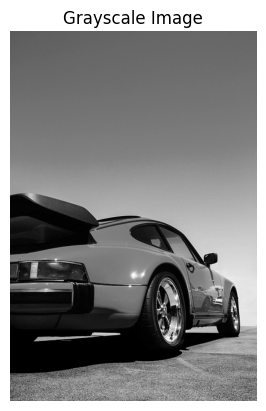

In [5]:
img_np=np.array(img)
r=img_np[:,:,0]
g=img_np[:,:,1]
b=img_np[:,:,2]
x=0.299
y=0.587
z=0.114
gray=r*x+g*y+b*z
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

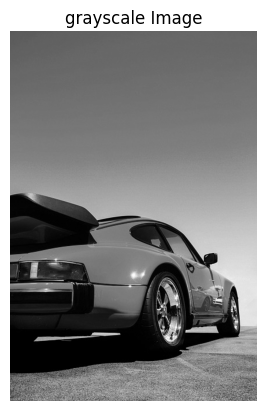

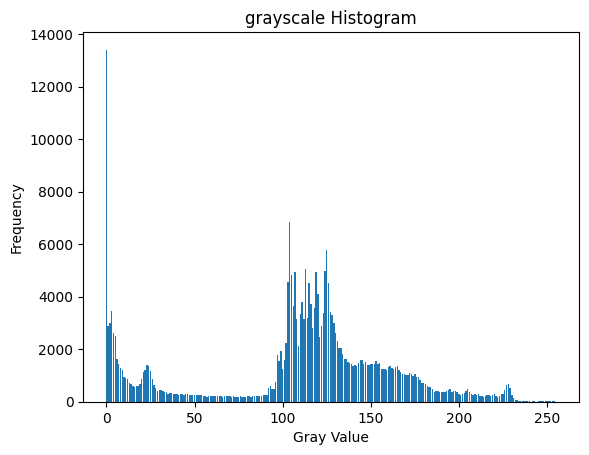

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def gray_histogram(gray_img):
    hist = np.zeros(256, dtype=int)
    rows, cols = gray_img.shape

    for i in range(rows):
        for j in range(cols):
            p_val = int(gray_img[i,j])
            hist[p_val]+=1

    return hist


img_np = np.array(img)
r = img_np[:,:,0]
g = img_np[:,:,1]
b = img_np[:,:,2]
x = 0.299
y = 0.587
z = 0.114
gray = (r*x + g*y +b*z).astype(int)
plt.imshow(gray,cmap='gray')
plt.title('grayscale Image')
plt.axis('off')
plt.show()

hist = gray_histogram(gray)
plt.bar(range(256), hist)
plt.title('grayscale Histogram')
plt.xlabel('Gray Value')
plt.ylabel('Frequency')
plt.show()

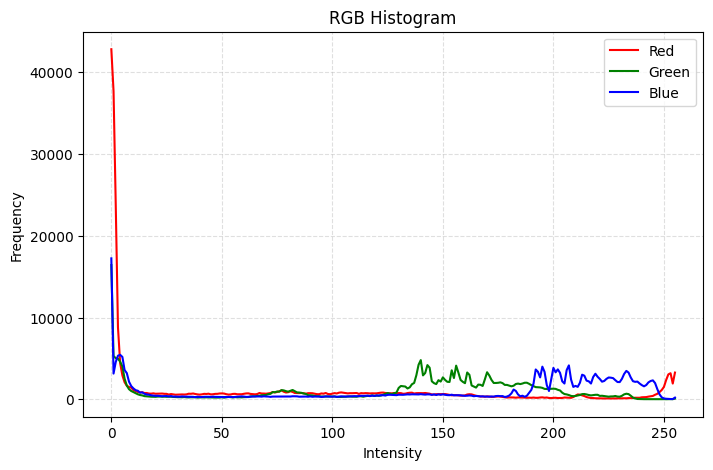

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def rgb_histogram(img):
    hist_r = np.zeros(256, dtype=int)
    hist_g = np.zeros(256, dtype=int)
    hist_b = np.zeros(256, dtype=int)

    rows, cols, _ = img.shape
    for i in range(rows):
        for j in range(cols):
            r = int(img[i, j, 0])
            g = int(img[i, j, 1])
            b = int(img[i, j, 2])
            hist_r[r] += 1
            hist_g[g] += 1
            hist_b[b] += 1

    return hist_r, hist_g, hist_b

img_np = np.array(img)
hist_r, hist_g, hist_b = rgb_histogram(img_np)

plt.figure(figsize=(8,5))
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.title("RGB Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [8]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

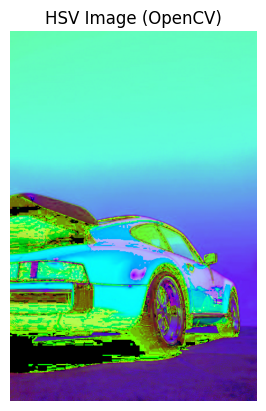

In [9]:

# using cv
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_hsv_cv(img_rgb):
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    return hsv

img_np = np.array(img)
hsv_img = rgb_to_hsv_cv(img_np)

plt.imshow(hsv_img)
plt.title("HSV Image")
plt.axis("off")
plt.show()


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [10]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [11]:
img_np=np.array(img)

FILTER 1 chamak
it is to adjust brightness and contrast in image ,this is suited because these modifications help enhance important details by making dark areas clearer and giving the image more depth.

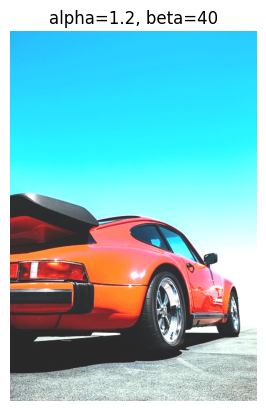

In [12]:


def adjust_brightness_contrast(img, alpha=1.0, beta=0):
    out = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    plt.imshow(out)
    plt.title(f"alpha={alpha}, beta={beta}")
    plt.axis('off')
    plt.show()
    return out

img_np = np.array(img, dtype=np.uint8)
result = adjust_brightness_contrast(img_np, alpha=1.2, beta=40)


FILTER 2  Rang Tarang Booster
I chose hue and saturation adjustments because they allow controlled enhancement of the images colors without affecting brightness or structure.

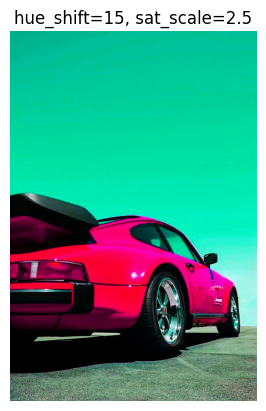

In [13]:
def f(img,hue_shift=0,sat_scale=1.0):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float32)
    hsv[..., 0] = (hsv[..., 0] + hue_shift) % 180
    hsv[..., 1] = np.clip(hsv[..., 1]*sat_scale,0,255)

    out = cv2.cvtColor(hsv.astype(np.uint8),cv2.COLOR_HSV2BGR)

    plt.imshow(out)
    plt.title(f"hue_shift={hue_shift}, sat_scale={sat_scale}")
    plt.axis('off')
    plt.show()

    return out

img_np=np.array(img, dtype=np.uint8)
result=f(img_np,hue_shift=15,sat_scale=2.5)


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [14]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

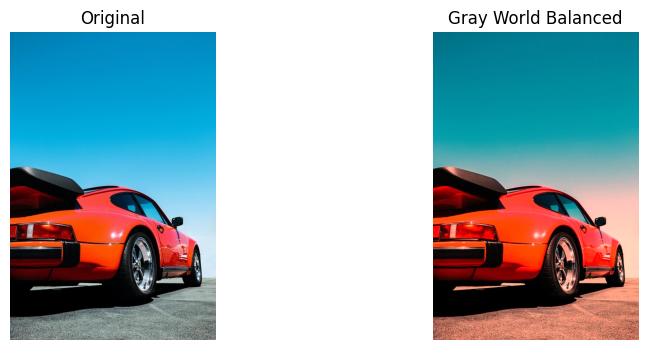

In [15]:
def gray_whitebalance(img_rgb):
    b,g,r= cv2.split(img_rgb.astype(np.float32))
    b_avg,g_avg, r_avg= np.mean(b),np.mean(g), np.mean(r)
    k =(b_avg + g_avg + r_avg)/3

    b*=k/b_avg
    g*=k/g_avg
    r*=k/r_avg

    b=np.clip(b,0,255).astype(np.uint8)
    g=np.clip(g,0,255).astype(np.uint8)
    r=np.clip(r,0,255).astype(np.uint8)

    wb=cv2.merge([b,g,r])

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(wb)
    plt.title("Gray World Balanced")
    plt.axis("off")
    plt.show()
    return wb
img_np =np.array(img, dtype=np.uint8)
result= gray_whitebalance(img_np)


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [16]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.